In [1]:
# using PlotlyJS
using Plots
using PyCall
using Printf
using LsqFit
using LinearAlgebra
using Statistics
# using Flux
using Random
using ForwardDiff
# using Distributed
# using Base.Threads
# using Pkg
# using Optim
gr()  

Plots.GRBackend()

In [2]:
function testLossDerivative(structuralParameterIndex::Int64, structuralParameterForDerivative)
    # println(typeof(structuralParameterForDerivative))
    T = typeof(structuralParameterForDerivative)
    dump(structuralParameterForDerivative)
    mlem::Vector{T} = zeros(3)
    println("ello guv")
    mlem[2] += structuralParameterForDerivative
    mlem[2] += structuralParameterForDerivative
    println("das ist meine beruf")
    println(mlem)
    typeof(mlem)
    return structuralParameterForDerivative
end
ForwardDiff.derivative(structuralParameterForDerivative -> testLossDerivative(1, structuralParameterForDerivative), 1.0)

ForwardDiff.Dual{ForwardDiff.Tag{var"#11#12", Float64}, Float64, 1}
  value: Float64 1.0
  partials: ForwardDiff.Partials{1, Float64}
    values: Tuple{Float64}
      1: Float64 1.0
ello guv
das ist meine beruf
ForwardDiff.Dual{ForwardDiff.Tag{var"#11#12", Float64}, Float64, 1}[Dual{ForwardDiff.Tag{var"#11#12", Float64}}(0.0,0.0), Dual{ForwardDiff.Tag{var"#11#12", Float64}}(2.0,2.0), Dual{ForwardDiff.Tag{var"#11#12", Float64}}(0.0,0.0)]


1.0

In [ ]:
grid[1:1, :]

In [ ]:
vcat(grid[1:1, :], grid[2:5, :]) - grid[1:5, :]

In [78]:
cond(trainingFeatureMatrix)
# cor(trainingFeatureMatrix)

9.15379284054354e9

In [104]:
U, S, V = svd(trainingFeatureMatrix)
U

5519×500 Matrix{Float64}:
 -0.0156564  -0.000365786  -0.00700639   …  -0.00438665  -0.0023831
 -0.0116929  -0.00463096   -0.00327768      -0.015751     0.00558683
 -0.0121779  -0.00165044   -0.00161993       0.0465106    0.0159002
 -0.0130915   0.0204829    -0.0067103       -0.00608308   0.0111743
 -0.0128871   0.0258691    -0.013662         0.00312663  -0.000726452
 -0.0125059   0.00228244    0.00729076   …  -0.0180955    0.0150897
 -0.0152062  -0.0106939     0.00291651       0.00168332   0.000742094
 -0.0121906  -0.0044516    -0.00464009       0.0151906    0.034533
 -0.0118498  -0.00701354    0.000190793      0.00869863  -0.055119
 -0.0133116  -0.0206109    -0.0161869       -0.00336542  -0.00025472
  ⋮                                      ⋱               
 -0.0145299  -0.00356065    0.0111278    …   0.00256332  -0.00457775
 -0.015353   -0.0146085    -0.00374481       0.00108203  -0.00672592
 -0.0120311  -0.0112154     0.00214723      -0.0169095   -0.00113146
 -0.0149467  -0.00125286 

In [105]:
S

500-element Vector{Float64}:
 894.2926946382873
 172.8667250843064
 165.96433817419467
 158.82271813771095
 152.72400716057274
 128.740188206703
 127.7954405519354
 102.1144099245928
  98.65994879770376
  96.27902190930712
   ⋮
   4.775338450157376e-7
   4.16072039224907e-7
   3.126978227945577e-7
   2.912914453132574e-7
   2.646711781675394e-7
   2.3519346285089877e-7
   1.9249650104251406e-7
   1.455883489394322e-7
   9.769640958934427e-8

In [120]:
svdThreshold::Float64 = 1e-4
svdComponentsToKeep::Vector{Int64} = findall(x -> x > svdThreshold, S)
# Keep only dominant singular directions
Vreduced = V[svdComponentsToKeep, :]        # rows of Vᵀ → basis vectors in feature space
Sreduced = S[svdComponentsToKeep]
Ureduced = U[:, svdComponentsToKeep]

Ureduced .* Sreduced'
# reducedTrainingFeatureMatrix = trainingFeatureMatrix*Vreduced'

5519×402 Matrix{Float64}:
 -14.0014  -0.0632323  -1.16281     4.42696   …  -3.45085e-7   9.59951e-9
 -10.4568  -0.800539   -0.543977   -0.614074     -1.15808e-6  -3.63432e-6
 -10.8906  -0.285306   -0.26885    -0.294015     -3.72367e-6  -6.87428e-6
 -11.7076   3.54082    -1.11367    -1.64571       9.64253e-8  -4.55258e-7
 -11.5249   4.47191    -2.26741    -1.10074      -3.84922e-9  -1.83229e-6
 -11.184    0.394558    1.21001    -3.06032   …  -1.56836e-6  -2.66341e-8
 -13.5988  -1.84861     0.484037    4.33079      -1.12063e-7  -1.35028e-7
 -10.902   -0.769533   -0.77009    -1.07484      -6.95887e-7   3.16261e-6
 -10.5972  -1.21241     0.0316649  -3.09044      -5.25842e-6   1.98935e-6
 -11.9044  -3.56294    -2.68645    -2.16734       4.26873e-7   4.84818e-7
   ⋮                                          ⋱   ⋮           
 -12.994   -0.615518    1.84682     3.45036   …  -5.09463e-8  -9.16519e-7
 -13.7301  -2.52532    -0.621504    3.29491      -1.21487e-8   3.20811e-7
 -10.7593  -1.93877    

In [110]:
cond(reducedTrainingFeatureMatrix)
# trainingFeatureMatrix

3.442233521350775e6

In [94]:
V

500×500 adjoint(::Matrix{Float64}) with eltype Float64:
  0.00827485   -0.0332409    -0.0377082    …   0.0017255     2.8318e-5
  0.0428325    -0.0515077    -0.0208508        0.00809332    0.0063399
  0.0460517    -0.0160903    -0.0303008        0.00433002   -0.0145366
  0.0985217     0.0481657     0.0723684       -2.00247e-5   -6.74236e-6
  0.0760369     0.127838      0.0775269       -4.55966e-7    3.40311e-7
 -0.00839316   -0.00701661    0.00830619   …   0.000124661  -4.69436e-5
  0.0254065    -0.000222495   0.0861631        2.04704e-7    1.50803e-7
  0.00722875    0.026232      0.0192369        6.98526e-5   -0.000343996
  0.062109     -0.10041       0.0578008        2.60904e-6   -2.49815e-7
  0.0386185     0.057156     -0.0859783       -2.34177e-6    5.15428e-7
  ⋮                                        ⋱                
 -0.0138014     0.00269313   -0.0101292        0.00237073   -0.000449469
 -0.00582097   -0.0214314     0.0197869        0.000103109   3.19628e-5
 -0.0046532    -0.01

In [144]:
# Test ELM
include("ABC.jl")

hartreeToWavenumberConversion::Float64 = 2.194746354e5
convertToRadians::Float64 = pi/180

inputFileName::String = "HOCl-VQZ-fit-ELM"

potentialInputFilePath::String = inputFileName*".inp"

keywords::Vector{String} = ["structural", "linear", "grid"]
inputBlocks::Vector{Vector{String}} = []
open(potentialInputFilePath, "r") do potentialInputFile::IOStream
    input::Vector{String} = readlines(potentialInputFile)
    addToBlock::Bool = false
    for keyword in keywords
        newBlock::Vector{String} = []
        for line in input
            if lowercase(line) == lowercase(keyword)
                addToBlock = true
            elseif lowercase(line) == "end"
                addToBlock = false
            end
            if addToBlock
                push!(newBlock, line)
            end
        end
        push!(inputBlocks, newBlock)
    end
end

structuralParameterBlock::Vector{String} = inputBlocks[1][2:end]
numberOfStructuralParameters::Int64 = size(structuralParameterBlock)[1] - 1
structuralParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(structuralParameterBlock, r"\s+")
numberOfMorseParameters::Int64 = parse(Int64, structuralParameterBlockSplit[1][2])
numberOfEquilibriumParameters::Int64 = numberOfStructuralParameters - numberOfMorseParameters
numberOfModes::Int64 = size(structuralParameterBlockSplit[2])[1] - 3
numberOfAtoms::Int64 = (numberOfModes + 6)/3
numberOfStretches::Int64 = numberOfAtoms - 1
numberOfBondAngles::Int64 = numberOfAtoms - 2
numberOfDihedrals::Int64 = numberOfAtoms - 3

structuralParameters::Vector{Float64} = zeros(numberOfStructuralParameters)
structuralParameterLabels::Vector{String} = []
structuralPowers::Matrix{Int64} = zeros(numberOfStructuralParameters, numberOfModes)
structuralParametersOn::Vector{Int64} = zeros(numberOfStructuralParameters)
for i in 1:numberOfStructuralParameters
    structuralParameters[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end])
    push!(structuralParameterLabels, String(structuralParameterBlockSplit[i + 1][1]))
    structuralPowers[i, :] = parse.(Int64, structuralParameterBlockSplit[i + 1][2:end-2])
    structuralParametersOn[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end - 1])
end

structuralParameters::Vector{Float64} = convertAnglesToRadians(structuralParameters)

linearParameterBlock::Vector{String} = inputBlocks[2][2:end]
numberOfLinearParameters::Int64 = size(linearParameterBlock)[1]
linearParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(linearParameterBlock, r"\s+")

linearParameters::Vector{Float64} = zeros(numberOfLinearParameters)
linearParameterLabels::Vector{String} = []
linearPowers::Matrix{Int64} = zeros(numberOfLinearParameters, numberOfModes)
linearParametersOn::Vector{Int64} = zeros(numberOfLinearParameters)

for i in 1:numberOfLinearParameters
    linearParameters[i] = parse(Float64, linearParameterBlockSplit[i][end])
    push!(linearParameterLabels, String(linearParameterBlockSplit[i][1]))
    linearPowers[i, :] = parse.(Int64, linearParameterBlockSplit[i][2:end-2])
    linearParametersOn[i] = parse(Float64, linearParameterBlockSplit[i][end - 1])
end

allParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)
allParameterLabels::Vector{String} = vcat(structuralParameterLabels, linearParameterLabels)
allPowers::Matrix{Int64} = vcat(structuralPowers, linearPowers)
allParametersOn::Vector{Int64} = vcat(structuralParametersOn, linearParametersOn)
numberOfParameters::Int64 = length(allParameters)
 
gridBlock::Vector{String} = inputBlocks[3][2:end]
numberOfGridPoints::Int64 = size(gridBlock)[1] 
gridBlockSplit::Vector{Vector{SubString{String}}} = split.(gridBlock, r"\s+")

grid::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
gridValenceCoordinates::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
energies::Vector{Float64} = zeros(numberOfGridPoints)

for i in 1:numberOfGridPoints
    grid[i, :]  = parse.(Float64, gridBlockSplit[i][1:numberOfModes])
    gridValenceCoordinates[i, :] = defineInternalCoordinates(grid[i, :])
    energies[i] = parse(Float64, gridBlockSplit[i][numberOfModes+1])
end

referenceGeometry::Vector{Float64} = gridValenceCoordinates[1, :] 

energies = energies.*hartreeToWavenumberConversion
minimumEnergy::Float64 = minimum(energies)
println()
# @printf("%12.10f \n", minimumEnergy)
energies = energies.-minimumEnergy

# Weight factor by Partridge and Schwenke
function computeWeightOfPoint(energy::Float64, energyThreshold=20000.0::Float64, energyMax=10000.0::Float64)::Float64
    weight::Float64 = (tanh(−0.0006*(energy - energyThreshold)) + 1.002002002)/2.002002002
    if energy > energyMax
        weight = weight/(0.0001*energy)
    else
        weight = weight/(0.0001*energyMax)
    end
    return weight
end

weights::Vector{Float64} = computeWeightOfPoint.(energies)
weightsSqrt::Vector{Float64} = sqrt.(weights)

function defineXiGrid(gridValenceCoordinates::Matrix{Float64}, structuralParameters)
    numberOfGridPoints::Int64 = size(gridValenceCoordinates)[1]
    T::DataType = eltype(structuralParameters)
    xiGrid::Matrix{T} = zeros(numberOfGridPoints, numberOfLinearParameters)
    for i in 1:numberOfGridPoints
        xi::Vector{T} = defineXiCoordinates(gridValenceCoordinates[i, :], structuralParameters)
        for j in 1:numberOfLinearParameters
            xiGrid[i, j] = prod(xi.^linearPowers[j, :])
        end
    end
    return xiGrid
end

randomSeed::MersenneTwister = MersenneTwister(42) # 42 original
randomSeed

numberOfNeurons::Int64 = 503 # 503 with Sinc seems good
numberOfInputs::Int64 = 3

weightsMatrix::Matrix{Float64} = randn(randomSeed, numberOfNeurons, numberOfLinearParameters)./sqrt(numberOfInputs)     
biasVector::Vector{Float64} = randn(randomSeed, numberOfNeurons)

xiGrid = defineXiGrid(gridValenceCoordinates, structuralParameters)

function rescaleXiGrid(xiGrid)
    xiMean = mean(xiGrid, dims=1)
    xiSTD = std(xiGrid, dims=1)
    xiGrid = (xiGrid .- xiMean)./xiSTD
    return xiGrid
end

xiGrid = rescaleXiGrid(xiGrid)


numberOfTestPoints::Int64 = Int(floor(0.1 * numberOfGridPoints))
numberOfTrainingPoints::Int64 = numberOfGridPoints - numberOfTestPoints

shuffledIndices::Vector{Int64} = randperm(randomSeed, numberOfGridPoints - 1)
trainingXiGrid = vcat(xiGrid[1:1, :], xiGrid[2:end, :][shuffledIndices[1:numberOfTrainingPoints - 1], :])
trainingEnergies = vcat(energies[1:1], energies[2:end][shuffledIndices[1:numberOfTrainingPoints - 1]])
trainingWeights::Vector{Float64} = computeWeightOfPoint.(trainingEnergies)
testingXiGrid = xiGrid[2:end, :][shuffledIndices[numberOfTrainingPoints:end], :]
testingEnergies = energies[2:end][shuffledIndices[numberOfTrainingPoints:end]]
testingWeights::Vector{Float64} = computeWeightOfPoint.(testingEnergies)


# LeCun Tanh activation
# trainingFeatureMatrix = 1.7159*tanh.((trainingXiGrid*weightsMatrix' .+ biasVector')*2/3)
# testFeatureMatrix::Matrix{Float64} = 1.7159*tanh.((testingXiGrid*weightsMatrix' .+ biasVector')*2/3)

# # Gaussian
# trainingFeatureMatrix = exp.(-(trainingXiGrid*weightsMatrix' .+ biasVector').^2)
# testFeatureMatrix::Matrix{Float64} = exp.(-(testingXiGrid*weightsMatrix' .+ biasVector').^2)

# Cos
# trainingFeatureMatrix = cos.(trainingXiGrid*weightsMatrix' .+ biasVector')
# testFeatureMatrix::Matrix{Float64} = cos.(testingXiGrid*weightsMatrix' .+ biasVector')

# Sin
# trainingFeatureMatrix = sin.(trainingXiGrid*weightsMatrix' .+ biasVector').^2
# testFeatureMatrix::Matrix{Float64} = sin.(testingXiGrid*weightsMatrix' .+ biasVector').^2

# Sinc
trainingFeatureMatrix = sinc.(trainingXiGrid*weightsMatrix' .+ biasVector')
testFeatureMatrix::Matrix{Float64} = sinc.(testingXiGrid*weightsMatrix' .+ biasVector')

swish(x) = x / (1 + exp(-x))
# Swish
# trainingFeatureMatrix = swish.(trainingXiGrid*weightsMatrix' .+ biasVector')
# testFeatureMatrix::Matrix{Float64} = swish.(testingXiGrid*weightsMatrix' .+ biasVector')

# Apply SVD
# U, S, V = svd(trainingFeatureMatrix)

weightedTrainingFeatures = trainingFeatureMatrix.*sqrt.(trainingWeights)
weightedTrainingEnergies = trainingEnergies.*sqrt.(trainingWeights)
λ::Float64 = 1e-9
# trainingFeatureMatrix'*weightedTrainingFeatures + λ*I
outputLayerParameters = (weightedTrainingFeatures'*weightedTrainingFeatures + λ*I) \ weightedTrainingFeatures'*weightedTrainingEnergies

testResiduals::Vector{Float64} = testingEnergies - testFeatureMatrix*outputLayerParameters
println("rms of test set: ", sqrt(mean(testingWeights.*testResiduals.^2)))
# weightedGFeatures = trainingFeatureMatrix.*sqrt.(trainingWeights)
# cor(trainingFeatureMatrix)  

sortedEnergyOrderingIndices::Vector{Int64} = sortperm(energies)
energies = energies[sortedEnergyOrderingIndices]
grid = grid[sortedEnergyOrderingIndices, :]
gridValenceCoordinates = gridValenceCoordinates[sortedEnergyOrderingIndices, :]
# xiMatrix = xiMatrix[sortedEnergyOrderingIndices, :]

# computedEnergies::Vector{Float64} = xiMatrix*linearParameters
# residuals::Vector{Float64} = energies .- computedEnergies

# structuralParameters = convertAnglesToDegrees(structuralParameters)

# fittedParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)

# open(inputFileName*".out", "w") do outputFile::IOStream
#     println(outputFile, "New model:")
#     for i in 1:numberOfParameters
#         @printf(outputFile, "f   %4.0f %4.0f %4.0f  %12.12f\n", allPowers[i, 1], allPowers[i, 2], allPowers[i, 3], fittedParameters[i])
#     end
#     println(outputFile, )
#     println(outputFile, "Grid of energies:")
#     for i in 1:numberOfGridPoints
#         @printf(outputFile, "%12.8f %12.8f %12.8f  %12.12f %12.12f %12.12f\n", grid[i, 1], grid[i, 2], grid[i, 3],  energies[i], computedEnergies[i], residuals[i])
#     end
# end
# weights = computeWeightOfPoint.(energies)
# weightedRms::Float64 = sqrt(mean(weights.*residuals.^2))
# println(weightedRms)


rms of test set: 0.30168002249018894


6132×3 Matrix{Float64}:
 0.964462  1.68888  1.79769
 0.964462  1.69388  1.79769
 0.964462  1.68388  1.79769
 0.961053  1.69172  1.79769
 0.969462  1.68888  1.79769
 0.959462  1.68888  1.79769
 0.964462  1.69656  1.78688
 0.964462  1.68133  1.79475
 0.964462  1.68888  1.78024
 0.964462  1.68888  1.81514
 ⋮                  
 0.683454  1.88827  1.79799
 0.691562  1.47498  1.79749
 0.678627  1.57394  1.68729
 0.676474  1.72901  1.56505
 0.684736  1.68888  2.30389
 0.674271  1.7697   1.79769
 0.674723  1.72965  2.01916
 0.671801  1.85122  1.79769
 0.664462  1.68888  1.79769

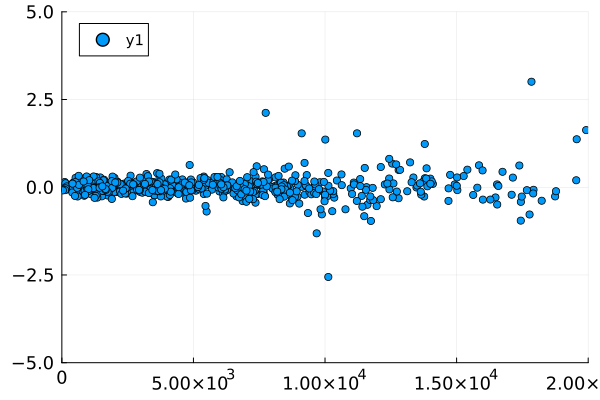

In [148]:
Plots.scatter(testingEnergies, testResiduals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
    xlimits=(0,20000),
    ylimits=(-5, 5)
)

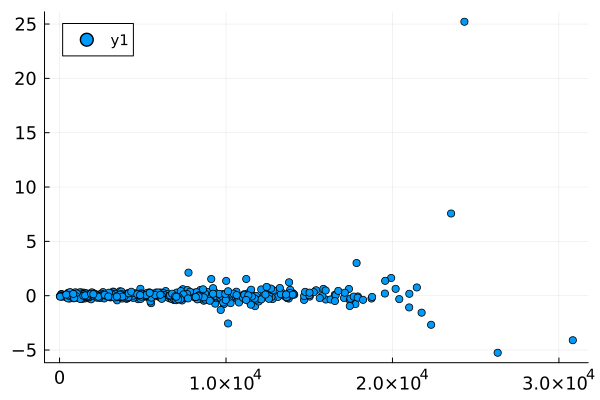

In [146]:
Plots.scatter(testingEnergies, testResiduals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
)

In [25]:
cor(trainingFeatureMatrix)
cond(trainingFeatureMatrix)

2.733035160090236e8

In [295]:
# energyCapIndex::Int64 = length(filter((x) -> x < 10000, testingEnergies))
# sqrt(mean(testResiduals[1:energyCapIndex].^2))

In [205]:
# Test ELM
include("ABC.jl")

# Define Chebyshev polyonmials for construction of basis
chebyshevPolynomials::Vector{Function} = [
    x -> 1
    x -> x
    x -> 2*x^2 - 1
    x -> 4*x^3 - 3*x
    x -> 8*x^4 - 8*x^2 + 1
    x -> 16*x^5 - 20*x^3 + 5*x
    x -> 32*x^6 - 48*x^4 + 18*x^2 - 1
    x -> 64*x^7 - 112*x^5 + 56*x^3 - 7*x
    x -> 128*x^8 - 256*x^6 + 160*x^4 - 32*x^2 + 1
]
# Note Julia indexing starts from 1 so chebyshevPolynomials[n] is actually T_n-1 and so forth!

hartreeToWavenumberConversion::Float64 = 2.194746354e5
convertToRadians::Float64 = pi/180

# inputFileName::String = "HOCl-VQ+dZ"
# inputFileName::String = "HOCl-VQZ-fit"
# inputFileName::String = "HOCl-VQZ-fit-InitialFit"
# inputFileName::String = "HOCl-VQZ-fit-4thOrder"
# inputFileName::String = "HOCl-VQZ-fit-5thOrder"
# inputFileName::String = "HOCl-VQZ-fit-6thOrder"
inputFileName::String = "HOCl-VQZ-fit-8thOrder"
# inputFileName::String = "HOCl-VQZ-fit-7thOrder"
# inputFileName::String = "HOCl-VQZ-1D-rOH"
potentialInputFilePath::String = inputFileName*".inp"

keywords::Vector{String} = ["structural", "linear", "grid"]
inputBlocks::Vector{Vector{String}} = []
open(potentialInputFilePath, "r") do potentialInputFile::IOStream
    input::Vector{String} = readlines(potentialInputFile)
    addToBlock::Bool = false
    for keyword in keywords
        newBlock::Vector{String} = []
        for line in input
            if lowercase(line) == lowercase(keyword)
                addToBlock = true
            elseif lowercase(line) == "end"
                addToBlock = false
            end
            if addToBlock
                push!(newBlock, line)
            end
        end
        push!(inputBlocks, newBlock)
    end
end

structuralParameterBlock::Vector{String} = inputBlocks[1][2:end]
numberOfStructuralParameters::Int64 = size(structuralParameterBlock)[1] - 1
structuralParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(structuralParameterBlock, r"\s+")
numberOfMorseParameters::Int64 = parse(Int64, structuralParameterBlockSplit[1][2])
numberOfEquilibriumParameters::Int64 = numberOfStructuralParameters - numberOfMorseParameters
numberOfModes::Int64 = size(structuralParameterBlockSplit[2])[1] - 3
numberOfAtoms::Int64 = (numberOfModes + 6)/3
numberOfStretches::Int64 = numberOfAtoms - 1
numberOfBondAngles::Int64 = numberOfAtoms - 2
numberOfDihedrals::Int64 = numberOfAtoms - 3

structuralParameters::Vector{Float64} = zeros(numberOfStructuralParameters)
structuralParameterLabels::Vector{String} = []
structuralPowers::Matrix{Int64} = zeros(numberOfStructuralParameters, numberOfModes)
structuralParametersOn::Vector{Int64} = zeros(numberOfStructuralParameters)
for i in 1:numberOfStructuralParameters
    structuralParameters[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end])
    push!(structuralParameterLabels, String(structuralParameterBlockSplit[i + 1][1]))
    structuralPowers[i, :] = parse.(Int64, structuralParameterBlockSplit[i + 1][2:end-2])
    structuralParametersOn[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end - 1])
end

structuralParameters::Vector{Float64} = convertAnglesToRadians(structuralParameters)

linearParameterBlock::Vector{String} = inputBlocks[2][2:end]
numberOfLinearParameters::Int64 = size(linearParameterBlock)[1]
linearParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(linearParameterBlock, r"\s+")

linearParameters::Vector{Float64} = zeros(numberOfLinearParameters)
linearParameterLabels::Vector{String} = []
linearPowers::Matrix{Int64} = zeros(numberOfLinearParameters, numberOfModes)
linearParametersOn::Vector{Int64} = zeros(numberOfLinearParameters)

for i in 1:numberOfLinearParameters
    linearParameters[i] = parse(Float64, linearParameterBlockSplit[i][end])
    push!(linearParameterLabels, String(linearParameterBlockSplit[i][1]))
    linearPowers[i, :] = parse.(Int64, linearParameterBlockSplit[i][2:end-2])
    linearParametersOn[i] = parse(Float64, linearParameterBlockSplit[i][end - 1])
end

allParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)
allParameterLabels::Vector{String} = vcat(structuralParameterLabels, linearParameterLabels)
allPowers::Matrix{Int64} = vcat(structuralPowers, linearPowers)
allParametersOn::Vector{Int64} = vcat(structuralParametersOn, linearParametersOn)
numberOfParameters::Int64 = length(allParameters)
 
gridBlock::Vector{String} = inputBlocks[3][2:end]
numberOfGridPoints::Int64 = size(gridBlock)[1] 
gridBlockSplit::Vector{Vector{SubString{String}}} = split.(gridBlock, r"\s+")

grid::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
gridValenceCoordinates::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
energies::Vector{Float64} = zeros(numberOfGridPoints)

for i in 1:numberOfGridPoints
    grid[i, :]  = parse.(Float64, gridBlockSplit[i][1:numberOfModes])
    gridValenceCoordinates[i, :] = defineInternalCoordinates(grid[i, :])
    energies[i] = parse(Float64, gridBlockSplit[i][numberOfModes+1])
end

referenceGeometry::Vector{Float64} = gridValenceCoordinates[1, :] 

energies = energies.*hartreeToWavenumberConversion
minimumEnergy::Float64 = minimum(energies)
println()
# @printf("%12.10f \n", minimumEnergy)
energies = energies.-minimumEnergy

# Weight factor by Partridge and Schwenke
function computeWeightOfPoint(energy::Float64, energyThreshold=20000.0::Float64, energyMax=10000.0::Float64)::Float64
    weight::Float64 = (tanh(−0.0006*(energy - energyThreshold)) + 1.002002002)/2.002002002
    if energy > energyMax
        weight = weight/(0.0001*energy)
    else
        weight = weight/(0.0001*energyMax)
    end
    return weight
end

weights::Vector{Float64} = computeWeightOfPoint.(energies)
weightsSqrt::Vector{Float64} = sqrt.(weights)

function defineXiGrid(gridValenceCoordinates::Matrix{Float64}, structuralParameters)
    numberOfGridPoints::Int64 = size(gridValenceCoordinates)[1]
    T::DataType = eltype(structuralParameters)
    xiGrid::Matrix{T} = zeros(numberOfGridPoints, numberOfModes)
    for i in 1:numberOfGridPoints
        xiGrid[i, :] = defineXiCoordinates(gridValenceCoordinates[i, :], structuralParameters)
    end
    return xiGrid
end

function rescaleXiGrid(xiGrid)
    xiMaxima = maximum(xiGrid, dims=1)[1, :]
    xiMinima = minimum(xiGrid, dims=1)[1, :]
    xiGrid = (2*xiGrid .- (xiMaxima .+ xiMinima)')./(xiMaxima .- xiMinima)'
    return xiGrid
end

function defineChebyshevBasis(xiGrid)
    numberOfGridPoints::Int64 = size(xiGrid)[1]
    T::DataType = eltype(xiGrid)
    xiMatrix::Matrix{T} = zeros(numberOfGridPoints, numberOfLinearParameters)
    for i in 1:numberOfGridPoints
        for j in 1:numberOfLinearParameters
            xiMatrix[i, j] = chebyshevPolynomials[linearPowers[j, 1]+1](xiGrid[i, 1])*chebyshevPolynomials[linearPowers[j, 2]+1](xiGrid[i, 2])*chebyshevPolynomials[linearPowers[j, 3]+1](xiGrid[i, 3])
        end
    end
    return xiMatrix
end

function solveLinearRegressionForForwardDiff(gridValenceCoordinates::Matrix{Float64}, energies::Vector{Float64}, weights::Vector{Float64}, structuralParameterIndex, structuralParameterForDerivative, λ::Float64 = 1e-7)
    T::DataType = typeof(structuralParameterForDerivative)
    numberOfGridPoints::Int64 = length(energies)
    structuralParametersInLossFunction::Vector{T} = copy(structuralParameters)
    structuralParametersInLossFunction[structuralParameterIndex] = structuralParameterForDerivative
    xiGrid = defineXiGrid(gridValenceCoordinates, structuralParametersInLossFunction)
    xiGrid = rescaleXiGrid(xiGrid)
    xiMatrix = defineChebyshevBasis(xiGrid)
    weightsSqrt::Vector{Float64} = sqrt.(weights)
    weightedXiMatrix = xiMatrix .* weightsSqrt
    weightedEnergies = energies .* weightsSqrt
    tikhonovMatrix::Matrix{Float64} = λ.*Matrix(1I, numberOfLinearParameters, numberOfLinearParameters)
    linearParametersOfFit = (weightedXiMatrix'*weightedXiMatrix + tikhonovMatrix)\ (weightedXiMatrix'*weightedEnergies)
    computedEnergies::Vector{T} = xiMatrix*linearParametersOfFit
    residuals::Vector{T} = energies .- computedEnergies
    loss::T = (sum(weights.*residuals.^2) + sum(λ.*linearParametersOfFit.^2))/numberOfGridPoints
end


structuralParameterBounds::Vector{Vector{Float64}} = [
    [0.96446195 - 1.0, 0.96446195 + 1.0],
    [1.68888476 - 1.0, 1.68888476 + 1.0],
    [1.7976891295541595 - 1.0*convertToRadians, 1.7976891295541595 + 1.0*convertToRadians],
    [1.0, 3.0],
    [1.0, 3.0]
]

learningRate::Float64 = 1e-2
ϵ::Float64 = 1e-4 # Regulate weights
λ::Float64 = 0e-9 # Tikhonov Regularization parameter
epochs::Int64 = 50
for epoch in 1:epochs
    structuralParameterGradient::Vector{Float64} = zeros(numberOfStructuralParameters)
    for i in 1:numberOfStructuralParameters
        if structuralParametersOn[i] == 1
            structuralParameterGradient[i] = ForwardDiff.derivative(structuralParameter -> solveLinearRegressionForForwardDiff(gridValenceCoordinates, energies, weights, i, structuralParameter, λ), structuralParameters[i])
        end
    end
    # println(structuralParameterGradient)
    structuralParameters -= learningRate.*structuralParameterGradient
    structuralParameters = map((parameter, bound) -> clamp(parameter, bound[1], bound[2]), structuralParameters, structuralParameterBounds)
    xiGrid = defineXiGrid(gridValenceCoordinates, structuralParameters)
    xiGrid = rescaleXiGrid(xiGrid)
    xiMatrix::Matrix{Float64} = defineChebyshevBasis(xiGrid)
    weightsSqrt::Vector{Float64} = sqrt.(weights)
    weightedXiMatrix = xiMatrix .* weightsSqrt
    weightedEnergies = energies .* weightsSqrt
    linearParameters = (weightedXiMatrix'*weightedXiMatrix + λ.*Matrix(1I, numberOfLinearParameters, numberOfLinearParameters))\ (weightedXiMatrix'*weightedEnergies)
    residuals::Vector{Float64} = xiMatrix*linearParameters .- energies
    weights = 1 ./ (residuals.^2 .+ ϵ)
    println("Epoch $(epoch), Loss = ", sum(weights.*residuals.^2)/numberOfGridPoints)
    # Q, R = qr(Diagonal(weightsSqrt)*xiMatrix)
    # linearParameters = R \ (Matrix(Q)' * (energies.*weightsSqrt))
end


xiGrid = defineXiGrid(gridValenceCoordinates, structuralParameters)
xiGrid = rescaleXiGrid(xiGrid)
xiMatrix::Matrix{Float64} = defineChebyshevBasis(xiGrid)
# Q, R = qr(Diagonal(weightsSqrt)*testXiMatrix)
# linearParameters = R \ (Matrix(Q)' * (energies.*weightsSqrt))
# linearParameters
# println(solveLinearRegressionForForwardDiff(gridValenceCoordinates, energies, weights, 1, structuralParameters[1]))

sortedEnergyOrderingIndices::Vector{Int64} = sortperm(energies)
energies = energies[sortedEnergyOrderingIndices]
grid = grid[sortedEnergyOrderingIndices, :]
xiMatrix = xiMatrix[sortedEnergyOrderingIndices, :]

computedEnergies::Vector{Float64} = xiMatrix*linearParameters
residuals::Vector{Float64} = energies .- computedEnergies

structuralParameters = convertAnglesToDegrees(structuralParameters)

fittedParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)

open(inputFileName*".out", "w") do outputFile::IOStream
    println(outputFile, "New model:")
    for i in 1:numberOfParameters
        @printf(outputFile, "f   %4.0f %4.0f %4.0f  %12.12f\n", allPowers[i, 1], allPowers[i, 2], allPowers[i, 3], fittedParameters[i])
    end
    println(outputFile, )
    println(outputFile, "Grid of energies:")
    for i in 1:numberOfGridPoints
        @printf(outputFile, "%12.8f %12.8f %12.8f  %12.12f %12.12f %12.12f\n", grid[i, 1], grid[i, 2], grid[i, 3],  energies[i], computedEnergies[i], residuals[i])
    end
end
weights = computeWeightOfPoint.(energies)
weightedRms::Float64 = sqrt(mean(weights.*residuals.^2))
println(weightedRms)


Epoch 1, Loss = 0.9851796203264196
Epoch 2, Loss = 0.9750285801343594
Epoch 3, Loss = 0.9684550450842816
Epoch 4, Loss = 0.9651940103395584
Epoch 5, Loss = 0.9617963857898107
Epoch 6, Loss = 0.9585033546022543
Epoch 7, Loss = 0.9577526049924698
Epoch 8, Loss = 0.9566549701523648
Epoch 9, Loss = 0.9556292791461645
Epoch 10, Loss = 0.9548093028212149
Epoch 11, Loss = 0.9530810819737116
Epoch 12, Loss = 0.9509211581734887
Epoch 13, Loss = 0.9501135613161458
Epoch 14, Loss = 0.9492175589281062
Epoch 15, Loss = 0.948502437907443
Epoch 16, Loss = 0.9474474011767514
Epoch 17, Loss = 0.9470102794575179
Epoch 18, Loss = 0.9464883206284879
Epoch 19, Loss = 0.9458531165236287
Epoch 20, Loss = 0.9456081601346488
Epoch 21, Loss = 0.9457150482142194
Epoch 22, Loss = 0.9451210769955328
Epoch 23, Loss = 0.9448173196844258
Epoch 24, Loss = 0.94404622390164
Epoch 25, Loss = 0.9435907194999675
Epoch 26, Loss = 0.9438842359997153
Epoch 27, Loss = 0.9431545059291334
Epoch 28, Loss = 0.9416255797676079
Epo

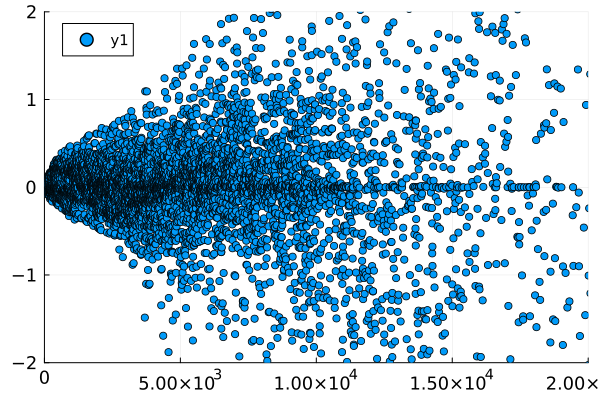

In [206]:
Plots.scatter(energies, residuals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
    xlimits=(0,20000),
    ylimits=(-2, 2)
)

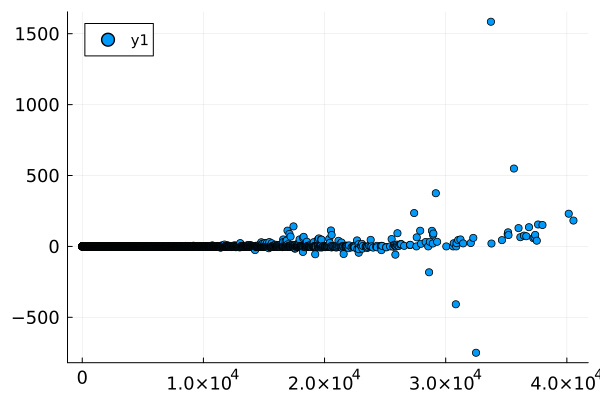

In [202]:
Plots.scatter(energies, residuals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
)

In [199]:
cond(xiMatrix)

396735.6580625885

In [ ]:
# Fit with orthogonal polynomials
include("ABC.jl")

# Define Chebyshev polyonmials for construction of basis
chebyshevPolynomials::Vector{Function} = [
    x -> 1
    x -> x
    x -> 2*x^2 - 1
    x -> 4*x^3 - 3*x
    x -> 8*x^4 - 8*x^2 + 1
    x -> 16*x^5 - 20*x^3 + 5*x
    x -> 32*x^6 - 48*x^4 + 18*x^2 - 1
    x -> 64*x^7 - 112*x^5 + 56*x^3 - 7*x
    x -> 128*x^8 - 256*x^6 + 160*x^4 - 32*x^2 + 1
]
# Note Julia indexing starts from 1 so chebyshevPolynomials[n] is actually T_n-1 and so forth!

hartreeToWavenumberConversion::Float64 = 2.194746354e5
convertToRadians::Float64 = pi/180

# inputFileName::String = "HOCl-VQ+dZ"
# inputFileName::String = "HOCl-VQZ-fit"
# inputFileName::String = "HOCl-VQZ-fit-InitialFit"
# inputFileName::String = "HOCl-VQZ-fit-4thOrder"
# inputFileName::String = "HOCl-VQZ-fit-5thOrder"
# inputFileName::String = "HOCl-VQZ-fit-6thOrder"
inputFileName::String = "HOCl-VQZ-fit-8thOrder"
# inputFileName::String = "HOCl-VQZ-fit-7thOrder"
# inputFileName::String = "HOCl-VQZ-1D-rOH"
potentialInputFilePath::String = inputFileName*".inp"

keywords::Vector{String} = ["structural", "linear", "grid"]
inputBlocks::Vector{Vector{String}} = []
open(potentialInputFilePath, "r") do potentialInputFile::IOStream
    input::Vector{String} = readlines(potentialInputFile)
    addToBlock::Bool = false
    for keyword in keywords
        newBlock::Vector{String} = []
        for line in input
            if lowercase(line) == lowercase(keyword)
                addToBlock = true
            elseif lowercase(line) == "end"
                addToBlock = false
            end
            if addToBlock
                push!(newBlock, line)
            end
        end
        push!(inputBlocks, newBlock)
    end
end

structuralParameterBlock::Vector{String} = inputBlocks[1][2:end]
numberOfStructuralParameters::Int64 = size(structuralParameterBlock)[1] - 1
structuralParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(structuralParameterBlock, r"\s+")
numberOfMorseParameters::Int64 = parse(Int64, structuralParameterBlockSplit[1][2])
numberOfEquilibriumParameters::Int64 = numberOfStructuralParameters - numberOfMorseParameters
numberOfModes::Int64 = size(structuralParameterBlockSplit[2])[1] - 3
numberOfAtoms::Int64 = (numberOfModes + 6)/3
numberOfStretches::Int64 = numberOfAtoms - 1
numberOfBondAngles::Int64 = numberOfAtoms - 2
numberOfDihedrals::Int64 = numberOfAtoms - 3

structuralParameters::Vector{Float64} = zeros(numberOfStructuralParameters)
structuralParameterLabels::Vector{String} = []
structuralPowers::Matrix{Int64} = zeros(numberOfStructuralParameters, numberOfModes)
structuralParametersOn::Vector{Int64} = zeros(numberOfStructuralParameters)
for i in 1:numberOfStructuralParameters
    structuralParameters[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end])
    push!(structuralParameterLabels, String(structuralParameterBlockSplit[i + 1][1]))
    structuralPowers[i, :] = parse.(Int64, structuralParameterBlockSplit[i + 1][2:end-2])
    structuralParametersOn[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end - 1])
end

structuralParameters::Vector{Float64} = convertAnglesToRadians(structuralParameters)

linearParameterBlock::Vector{String} = inputBlocks[2][2:end]
numberOfLinearParameters::Int64 = size(linearParameterBlock)[1]
linearParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(linearParameterBlock, r"\s+")

linearParameters::Vector{Float64} = zeros(numberOfLinearParameters)
linearParameterLabels::Vector{String} = []
linearPowers::Matrix{Int64} = zeros(numberOfLinearParameters, numberOfModes)
linearParametersOn::Vector{Int64} = zeros(numberOfLinearParameters)

for i in 1:numberOfLinearParameters
    linearParameters[i] = parse(Float64, linearParameterBlockSplit[i][end])
    push!(linearParameterLabels, String(linearParameterBlockSplit[i][1]))
    linearPowers[i, :] = parse.(Int64, linearParameterBlockSplit[i][2:end-2])
    linearParametersOn[i] = parse(Float64, linearParameterBlockSplit[i][end - 1])
end

allParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)
allParameterLabels::Vector{String} = vcat(structuralParameterLabels, linearParameterLabels)
allPowers::Matrix{Int64} = vcat(structuralPowers, linearPowers)
allParametersOn::Vector{Int64} = vcat(structuralParametersOn, linearParametersOn)
numberOfParameters::Int64 = length(allParameters)
 
gridBlock::Vector{String} = inputBlocks[3][2:end]
numberOfGridPoints::Int64 = size(gridBlock)[1] 
gridBlockSplit::Vector{Vector{SubString{String}}} = split.(gridBlock, r"\s+")

grid::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
gridValenceCoordinates::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
energies::Vector{Float64} = zeros(numberOfGridPoints)

for i in 1:numberOfGridPoints
    grid[i, :]  = parse.(Float64, gridBlockSplit[i][1:numberOfModes])
    gridValenceCoordinates[i, :] = defineInternalCoordinates(grid[i, :])
    energies[i] = parse(Float64, gridBlockSplit[i][numberOfModes+1])
end

referenceGeometry::Vector{Float64} = gridValenceCoordinates[1, :] 

energies = energies.*hartreeToWavenumberConversion
minimumEnergy::Float64 = minimum(energies)
println()
# @printf("%12.10f \n", minimumEnergy)
energies = energies.-minimumEnergy

# meanEnergy::Float64 = mean(energies)
# energyStandardDeviation::Float64 = std(energies)
# energiesScaled::Vector{Float64} = (energies .- meanEnergy)./energyStandardDeviation

# Weight factor by Partridge and Schwenke
function computeWeightOfPoint(energy::Float64, energyThreshold=20000.0::Float64, energyMax=10000.0::Float64)::Float64
    weight::Float64 = (tanh(−0.0006*(energy - energyThreshold)) + 1.002002002)/2.002002002
    if energy > energyMax
        weight = weight/(0.0001*energy)
    else
        weight = weight/(0.0001*energyMax)
    end
    return weight
end

weights::Vector{Float64} = computeWeightOfPoint.(energies)
weightsSqrt::Vector{Float64} = sqrt.(weights)

function defineXiGrid(gridValenceCoordinates::Matrix{Float64}, structuralParameters)
    numberOfGridPoints::Int64 = size(gridValenceCoordinates)[1]
    T::DataType = eltype(structuralParameters)
    xiGrid::Matrix{T} = zeros(numberOfGridPoints, numberOfModes)
    for i in 1:numberOfGridPoints
        xiGrid[i, :] = defineXiCoordinates(gridValenceCoordinates[i, :], structuralParameters)
    end
    return xiGrid
end

function rescaleXiGrid(xiGrid)
    xiMaxima = maximum(xiGrid, dims=1)[1, :]
    xiMinima = minimum(xiGrid, dims=1)[1, :]
    xiGrid = (2*xiGrid .- (xiMaxima .+ xiMinima)')./(xiMaxima .- xiMinima)'
    return xiGrid
end

function defineChebyshevBasis(xiGrid)
    numberOfGridPoints::Int64 = size(xiGrid)[1]
    T::DataType = eltype(xiGrid)
    xiMatrix::Matrix{T} = zeros(numberOfGridPoints, numberOfLinearParameters)
    for i in 1:numberOfGridPoints
        for j in 1:numberOfLinearParameters
            xiMatrix[i, j] = chebyshevPolynomials[linearPowers[j, 1]+1](xiGrid[i, 1])*chebyshevPolynomials[linearPowers[j, 2]+1](xiGrid[i, 2])*chebyshevPolynomials[linearPowers[j, 3]+1](xiGrid[i, 3])
        end
    end
    return xiMatrix
end

function solveLinearRegressionForForwardDiff(gridValenceCoordinates::Matrix{Float64}, energies::Vector{Float64}, weights::Vector{Float64}, structuralParameterIndex, structuralParameterForDerivative, λ::Float64 = 1e-7)
    T::DataType = typeof(structuralParameterForDerivative)
    numberOfGridPoints::Int64 = length(energies)
    structuralParametersInLossFunction::Vector{T} = copy(structuralParameters)
    structuralParametersInLossFunction[structuralParameterIndex] = structuralParameterForDerivative
    xiGrid = defineXiGrid(gridValenceCoordinates, structuralParametersInLossFunction)
    xiGrid = rescaleXiGrid(xiGrid)
    xiMatrix = defineChebyshevBasis(xiGrid)
    weightsSqrt::Vector{Float64} = sqrt.(weights)
    weightedXiMatrix = xiMatrix .* weightsSqrt
    weightedEnergies = energies .* weightsSqrt
    tikhonovMatrix::Matrix{Float64} = λ.*Matrix(1I, numberOfLinearParameters, numberOfLinearParameters)
    linearParametersOfFit = (weightedXiMatrix'*weightedXiMatrix + tikhonovMatrix)\ (weightedXiMatrix'*weightedEnergies)
    computedEnergies::Vector{T} = xiMatrix*linearParametersOfFit
    residuals::Vector{T} = energies .- computedEnergies
    loss::T = (sum(weights.*residuals.^2) + sum(λ.*linearParametersOfFit.^2))/numberOfGridPoints
end


structuralParameterBounds::Vector{Vector{Float64}} = [
    [0.96446195 - 1.0, 0.96446195 + 1.0],
    [1.68888476 - 1.0, 1.68888476 + 1.0],
    [1.7976891295541595 - 1.0*convertToRadians, 1.7976891295541595 + 1.0*convertToRadians],
    [1.0, 3.0],
    [1.0, 3.0]
]

learningRate::Float64 = 1e-2
ϵ::Float64 = 1e-4 # Regulate weights
λ::Float64 = 1e-8 # Tikhonov Regularization parameter
epochs::Int64 = 50
for epoch in 1:epochs
    structuralParameterGradient::Vector{Float64} = zeros(numberOfStructuralParameters)
    for i in 1:numberOfStructuralParameters
        if structuralParametersOn[i] == 1
            structuralParameterGradient[i] = ForwardDiff.derivative(structuralParameter -> solveLinearRegressionForForwardDiff(gridValenceCoordinates, energies, weights, i, structuralParameter, λ), structuralParameters[i])
        end
    end
    # println(structuralParameterGradient)
    structuralParameters -= learningRate.*structuralParameterGradient
    structuralParameters = map((parameter, bound) -> clamp(parameter, bound[1], bound[2]), structuralParameters, structuralParameterBounds)
    xiGrid::Matrix{Float64} = defineXiGrid(gridValenceCoordinates, structuralParameters)
    xiGrid = rescaleXiGrid(xiGrid)
    xiMatrix::Matrix{Float64} = defineChebyshevBasis(xiGrid)
    weightsSqrt::Vector{Float64} = sqrt.(weights)
    weightedXiMatrix = xiMatrix .* weightsSqrt
    weightedEnergies = energies .* weightsSqrt
    linearParameters = (weightedXiMatrix'*weightedXiMatrix + λ.*Matrix(1I, numberOfLinearParameters, numberOfLinearParameters))\ (weightedXiMatrix'*weightedEnergies)
    residuals::Vector{Float64} = xiMatrix*linearParameters .- energies
    weights = 1 ./ (residuals.^2 .+ ϵ)
    println("Epoch $(epoch), Loss = ", sum(weights.*residuals.^2)/numberOfGridPoints)
    # Q, R = qr(Diagonal(weightsSqrt)*xiMatrix)
    # linearParameters = R \ (Matrix(Q)' * (energies.*weightsSqrt))
end


xiGrid::Matrix{Float64} = defineXiGrid(gridValenceCoordinates, structuralParameters)
xiGrid = rescaleXiGrid(xiGrid)
xiMatrix::Matrix{Float64} = defineChebyshevBasis(xiGrid)
# Q, R = qr(Diagonal(weightsSqrt)*testXiMatrix)
# linearParameters = R \ (Matrix(Q)' * (energies.*weightsSqrt))
# linearParameters
# println(solveLinearRegressionForForwardDiff(gridValenceCoordinates, energies, weights, 1, structuralParameters[1]))

sortedEnergyOrderingIndices::Vector{Int64} = sortperm(energies)
energies = energies[sortedEnergyOrderingIndices]
grid = grid[sortedEnergyOrderingIndices, :]
xiMatrix = xiMatrix[sortedEnergyOrderingIndices, :]

computedEnergies::Vector{Float64} = xiMatrix*linearParameters
residuals::Vector{Float64} = energies .- computedEnergies

structuralParameters = convertAnglesToDegrees(structuralParameters)

fittedParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)

open(inputFileName*".out", "w") do outputFile::IOStream
    println(outputFile, "New model:")
    for i in 1:numberOfParameters
        @printf(outputFile, "f   %4.0f %4.0f %4.0f  %12.12f\n", allPowers[i, 1], allPowers[i, 2], allPowers[i, 3], fittedParameters[i])
    end
    println(outputFile, )
    println(outputFile, "Grid of energies:")
    for i in 1:numberOfGridPoints
        @printf(outputFile, "%12.8f %12.8f %12.8f  %12.12f %12.12f %12.12f\n", grid[i, 1], grid[i, 2], grid[i, 3],  energies[i], computedEnergies[i], residuals[i])
    end
end
weights = computeWeightOfPoint.(energies)
weightedRms::Float64 = sqrt(mean(weights.*residuals.^2))
println(weightedRms)

In [ ]:
structuralParameters

In [ ]:
convertAnglesToRadians(structuralParameters)

In [ ]:
weightedXiMatrix

In [ ]:
Plots.scatter(energies, residuals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
)

In [ ]:
Plots.scatter(energies, residuals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
    xlimits=(0,20000),
    ylimits=(-20, 20)
)

In [ ]:
# weights = computeWeightOfPoint.(energies)
energyCapIndex::Int64 = length(filter((x) -> x < 10000, energies))
sqrt(mean(residuals[1:energyCapIndex].^2))

In [ ]:
include("ABC.jl")

# Define Chebyshev polyonmials for construction of basis
chebyshevPolynomials::Vector{Function} = [
    x -> 1
    x -> x
    x -> 2*x^2 - 1
    x -> 4*x^3 - 3*x
    x -> 8*x^4 - 8*x^2 + 1
    x -> 16*x^5 - 20*x^3 + 5*x
    x -> 32*x^6 - 48*x^4 + 18*x^2 - 1
    x -> 64*x^7 - 112*x^5 + 56*x^3 - 7*x
    x -> 128*x^8 - 256*x^6 + 160*x^4 - 32*x^2 + 1
]
# Note Julia indexing starts from 1 so chebyshevPolynomials[n] is actually T_n-1 and so forth!

hartreeToWavenumberConversion::Float64 = 2.194746354e5
convertToRadians::Float64 = pi/180

# inputFileName::String = "HOCl-VQ+dZ"
inputFileName::String = "HOCl-VQZ-fit"
# inputFileName::String = "HOCl-VQZ-fit-6thOrder"
# inputFileName::String = "HOCl-VQZ-1D-rOH"
potentialInputFilePath::String = inputFileName*".inp"

keywords::Vector{String} = ["structural", "linear", "grid"]
inputBlocks::Vector{Vector{String}} = []
open(potentialInputFilePath, "r") do potentialInputFile::IOStream
    input::Vector{String} = readlines(potentialInputFile)
    addToBlock::Bool = false
    for keyword in keywords
        newBlock::Vector{String} = []
        for line in input
            if lowercase(line) == lowercase(keyword)
                addToBlock = true
            elseif lowercase(line) == "end"
                addToBlock = false
            end
            if addToBlock
                push!(newBlock, line)
            end
        end
        push!(inputBlocks, newBlock)
    end
end

structuralParameterBlock::Vector{String} = inputBlocks[1][2:end]
numberOfStructuralParameters::Int64 = size(structuralParameterBlock)[1] - 1
structuralParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(structuralParameterBlock, r"\s+")
numberOfMorseParameters::Int64 = parse(Int64, structuralParameterBlockSplit[1][2])
numberOfEquilibriumParameters::Int64 = numberOfStructuralParameters - numberOfMorseParameters
numberOfModes::Int64 = size(structuralParameterBlockSplit[2])[1] - 3
numberOfAtoms::Int64 = (numberOfModes + 6)/3
numberOfStretches::Int64 = numberOfAtoms - 1
numberOfBondAngles::Int64 = numberOfAtoms - 2
numberOfDihedrals::Int64 = numberOfAtoms - 3

structuralParameters::Vector{Float64} = zeros(numberOfStructuralParameters)
structuralParameterLabels::Vector{String} = []
structuralPowers::Matrix{Int64} = zeros(numberOfStructuralParameters, numberOfModes)
structuralParametersOn::Vector{Int64} = zeros(numberOfStructuralParameters)
for i in 1:numberOfStructuralParameters
    structuralParameters[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end])
    push!(structuralParameterLabels, String(structuralParameterBlockSplit[i + 1][1]))
    structuralPowers[i, :] = parse.(Int64, structuralParameterBlockSplit[i + 1][2:end-2])
    structuralParametersOn[i] = parse(Float64, structuralParameterBlockSplit[i + 1][end - 1])
end

linearParameterBlock::Vector{String} = inputBlocks[2][2:end]
numberOfLinearParameters::Int64 = size(linearParameterBlock)[1]
linearParameterBlockSplit::Vector{Vector{SubString{String}}} = split.(linearParameterBlock, r"\s+")

linearParameters::Vector{Float64} = zeros(numberOfLinearParameters)
linearParameterLabels::Vector{String} = []
linearPowers::Matrix{Int64} = zeros(numberOfLinearParameters, numberOfModes)
linearParametersOn::Vector{Int64} = zeros(numberOfLinearParameters)

for i in 1:numberOfLinearParameters
    linearParameters[i] = parse(Float64, linearParameterBlockSplit[i][end])
    push!(linearParameterLabels, String(linearParameterBlockSplit[i][1]))
    linearPowers[i, :] = parse.(Int64, linearParameterBlockSplit[i][2:end-2])
    linearParametersOn[i] = parse(Float64, linearParameterBlockSplit[i][end - 1])
end

allParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)
allParameterLabels::Vector{String} = vcat(structuralParameterLabels, linearParameterLabels)
allPowers::Matrix{Int64} = vcat(structuralPowers, linearPowers)
allParametersOn::Vector{Int64} = vcat(structuralParametersOn, linearParametersOn)
numberOfParameters::Int64 = length(allParameters)
 
gridBlock::Vector{String} = inputBlocks[3][2:end]
numberOfGridPoints::Int64 = size(gridBlock)[1] 
gridBlockSplit::Vector{Vector{SubString{String}}} = split.(gridBlock, r"\s+")

grid::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
gridValenceCoordinates::Matrix{Float64} = zeros(numberOfGridPoints, numberOfModes)
energies::Vector{Float64} = zeros(numberOfGridPoints)

for i in 1:numberOfGridPoints
    grid[i, :]  = parse.(Float64, gridBlockSplit[i][1:numberOfModes])
    gridValenceCoordinates[i, :] = defineInternalCoordinates(grid[i, :])
    energies[i] = parse(Float64, gridBlockSplit[i][numberOfModes+1])
end

referenceGeometry::Vector{Float64} = gridValenceCoordinates[1, :] 

energies = energies.*hartreeToWavenumberConversion
minimumEnergy::Float64 = minimum(energies)
println()
# @printf("%12.10f \n", minimumEnergy)
energies = energies.-minimumEnergy

# meanEnergy::Float64 = mean(energies)
# energyStandardDeviation::Float64 = std(energies)
# energiesScaled::Vector{Float64} = (energies .- meanEnergy)./energyStandardDeviation

# Weight factor by Partridge and Schwenke
function computeWeightOfPoint(energy::Float64, energyThreshold=20000.0::Float64, energyMax=10000.0::Float64)::Float64
    weight::Float64 = (tanh(−0.0006*(energy - energyThreshold)) + 1.002002002)/2.002002002
    if energy > energyMax
        weight = weight/(0.0001*energy)
    else
        weight = weight/(0.0001*energyMax)
    end
    return weight
end

weights::Vector{Float64} = computeWeightOfPoint.(energies)
weightsSqrt::Vector{Float64} = sqrt.(weights)

function generateXiMatrix(gridValenceCoordinates::Matrix{Float64}, structuralParameters)
    T::DataType = eltype(structuralParameters)
    numberOfGridPoints::Int64 = size(gridValenceCoordinates)[1]
    xiMatrix::Matrix{T} = zeros(numberOfGridPoints, numberOfLinearParameters)
    for i in 1:numberOfGridPoints
        xi::Vector{T} = defineXiCoordinates(gridValenceCoordinates[i, :], structuralParameters)
        for j in 1:numberOfLinearParameters
            xiMatrix[i, j] = prod(xi.^linearPowers[j, :])
        end
    end
    return xiMatrix
end

structuralParameters::Vector{Float64} = convertAnglesToRadians(structuralParameters)

xiMatrix::Matrix{Float64} = generateXiMatrix(gridValenceCoordinates, structuralParameters)
normalizationMeans::Vector{Float64} = zeros(numberOfLinearParameters)
normalizationStandardDeviation::Vector{Float64} = ones(numberOfLinearParameters)
normalizationMeans[2:end] = mean(xiMatrix[:, 2:end], dims=1)[1, :]
normalizationStandardDeviation[2:end] = std(xiMatrix[:, 2:end], dims=1)[1, :]

normalizedXiMatrix::Matrix{Float64} = (xiMatrix .- normalizationMeans')./normalizationStandardDeviation'
# Scale parameters
for i in 2:numberOfLinearParameters
    linearParameters[i] *= normalizationStandardDeviation[i]
    linearParameters[1] += linearParameters[i]*normalizationMeans[i]/normalizationStandardDeviation[i]
end

function computeJacobian(xiMatrix::Matrix{Float64}, linearParameters::Vector{Float64}, energies::Vector{Float64}, weights::Vector{Float64})::Vector{Float64}
    numberOfGridPoints::Int64 = length(energies)
    residuals::Vector{Float64} = xiMatrix*linearParameters .- energies
    gradientVector::Vector{Float64} = 2*xiMatrix'*(weights.*residuals)/numberOfGridPoints
    return gradientVector
end

function getBatches(grid::Matrix{Float64}, energies::Vector{Float64}, weights::Vector{Float64}, batchSize::Int64)::Vector{Tuple{Matrix{Float64}, Vector{Float64}, Vector{Float64}}}
    numberOfGridPoints::Int64 = length(energies)
    indices::Vector{Int64} = randperm(numberOfGridPoints)
    batches::Vector{Tuple{Matrix{Float64}, Vector{Float64}, Vector{Float64}}} = []
    for i in 1:batchSize:numberOfGridPoints
        batchIndices::Vector{Int64} = indices[i:min(i + batchSize - 1, end)]
        push!(batches, (grid[batchIndices, :], energies[batchIndices], weights[batchIndices]))
    end
    return batches
end

ϵ::Float64 = 1e-4 # 1e-6
epochs::Int64 = 0
for epoch in 1:epochs
    residuals::Vector{Float64} = normalizedXiMatrix*linearParameters .- energies
    weights = computeWeightOfPoint.(energies)./(residuals.^2 .+ ϵ)
    weightsSqrt = sqrt.(weights)
    println("Normal eqation reweighted solution $(epoch - 1), Loss = ", sum(weights.*residuals.^2)/numberOfGridPoints)
    Q, R = qr(Diagonal(weightsSqrt)*normalizedXiMatrix)
    linearParameters = R \ (Matrix(Q)' * (energies.*weightsSqrt))
    # linearParameters = normalizedXiMatrix.*weightsSqrt \ (energies.*weightsSqrt)
end
println("linear part done")

function computeLossFromStructuralParameters(gridValenceCoordinates::Matrix{Float64}, energies::Vector{Float64}, weights::Vector{Float64}, structuralParameterIndex::Int64, structuralParameterForDerivative)
    # println("I've lost my battle before it starts")
    T::DataType = typeof(structuralParameterForDerivative)
    numberOfGridPoints::Int64 = length(energies)
    structuralParametersInLossFunction::Vector{T} = copy(structuralParameters) # zeros(numberOfStructuralParameters)
    structuralParametersInLossFunction[structuralParameterIndex] = structuralParameterForDerivative
    # println("My first breath wasn't done")
    xiMatrix::Matrix{T} = generateXiMatrix(gridValenceCoordinates, structuralParametersInLossFunction)
    # println("My spirits sunken deep into the ground")
    # normalizedXiMatrix::Matrix{T} = (xiMatrix .- normalizationMeans')./normalizationStandardDeviation'
    # println("Why am I alone?")
    loss::T = sum(weights.*(xiMatrix*linearParameters .- energies).^2)/numberOfGridPoints
    return loss
end

for i in 2:numberOfLinearParameters
    linearParameters[1] -= linearParameters[i]*normalizationMeans[i]/normalizationStandardDeviation[i]
    linearParameters[i] /= normalizationStandardDeviation[i]
end
println(linearParameters)

batchSize::Int64 = 7000
learningRate::Float64 = 0.01
epochs = 0
# println(learningRate*ForwardDiff.derivative(structuralParameter -> computeLossFromStructuralParameters(gridValenceCoordinates, energies, weights, 1, structuralParameter), structuralParameters[1]))
# structuralParametersBeingFit::Vector{Float64} = copy(structuralParameters)
for epoch in 1:epochs
    for (gridBatch, energyBatch, weightBatch) in getBatches(gridValenceCoordinates, energies, weights, batchSize)
        xiMatrixBatch::Matrix{Float64} = generateXiMatrix(gridBatch, structuralParameters)
        gradientVectorStructuralParameters::Vector{Float64} = zeros(numberOfStructuralParameters)
        for i in 1:numberOfStructuralParameters
            if structuralParametersOn[i] == 1
                gradientVectorStructuralParameters[i] = ForwardDiff.derivative(structuralParameter -> computeLossFromStructuralParameters(gridBatch, energyBatch, weightBatch, i, structuralParameter), structuralParameters[i])
            end
        end
        println(learningRate*gradientVectorStructuralParameters*1e-6)
        structuralParameters -= learningRate*gradientVectorStructuralParameters*1e-6
        # gradientVectorLinearParameters::Vector{Float64} = computeJacobian(xiMatrixBatch, linearParameters, energyBatch, weightBatch)
        # linearParameters -= learningRate*gradientVectorLinearParameters
    end
    # println("Epoch $epoch, Loss = ", sum(weights.*(normalizedXiMatrix*linearParameters .- energies).^2)/numberOfGridPoints)
    xiMatrix = generateXiMatrix(gridValenceCoordinates, structuralParameters)
    residuals::Vector{Float64} = xiMatrix*linearParameters .- energies
    println("Epoch $epoch, Loss = ", sum(weights.*residuals.^2)/numberOfGridPoints)
    # weights = computeWeightOfPoint.(energies)./(residuals.^2 .+ ϵ)
    # println("Epoch $epoch, Loss = ", loss(newParameters, gridValenceCoordinates, energies, weights))
end

sortedEnergyOrderingIndices::Vector{Int64} = sortperm(energies)
energies = energies[sortedEnergyOrderingIndices]
grid = grid[sortedEnergyOrderingIndices, :]
xiMatrix = xiMatrix[sortedEnergyOrderingIndices, :]

computedEnergies::Vector{Float64} = xiMatrix*linearParameters
residuals::Vector{Float64} = energies .- computedEnergies

structuralParameters = convertAnglesToDegrees(structuralParameters)

fittedParameters::Vector{Float64} = vcat(structuralParameters, linearParameters)

open(inputFileName*".out", "w") do outputFile::IOStream
    println(outputFile, "New model:")
    for i in 1:numberOfParameters
        @printf(outputFile, "f   %4.0f %4.0f %4.0f  %12.12f\n", allPowers[i, 1], allPowers[i, 2], allPowers[i, 3], fittedParameters[i])
    end
    println(outputFile, )
    println(outputFile, "Grid of energies:")
    for i in 1:numberOfGridPoints
        @printf(outputFile, "%12.8f %12.8f %12.8f  %12.12f %12.12f %12.12f\n", grid[i, 1], grid[i, 2], grid[i, 3],  energies[i], computedEnergies[i], residuals[i])
    end
end

In [ ]:
weightedRms::Float64 = sqrt(mean(weights.*residuals.^2))

In [ ]:
normalizationStandardDeviation
filter((x) -> 0 < abs(x) <= 1e-12, normalizationStandardDeviation)

In [ ]:
meanEnergy .+ energyStandardDeviation*normalisedXiMatrix*linearParameters

In [ ]:
println(1 + 1)

In [ ]:
computeJacobian(normalisedXiMatrix, energies, weights)

In [ ]:
cond(normalisedMatrix)

In [ ]:
filter((x) -> 0 < abs(x) <= 1e-12, xiMatrix)

In [ ]:
# weights = computeWeightOfPoint.(energies)
energyCapIndex::Int64 = length(filter((x) -> x < 10000, energies))
sqrt(mean(residuals[1:energyCapIndex].^2))

In [ ]:
sqrt(mean((residualsNormalised.*weights).^2))

In [ ]:
Plots.scatter(energies, residuals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
    xlimits=(0,15000),
    ylimits=(-5, 5)
)

In [ ]:
Plots.scatter(energies, residuals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
)

In [ ]:
Plots.scatter(energies, residuals,
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
    xlimits=(0,20000),
    ylimits=(-5, 5)
)

In [ ]:
residuals = weighted

In [ ]:
trace = PlotlyJS.scatter(
    x = energies,
    y = residuals,
    mode = "markers",  # for dots only
    marker = attr(
        size = 8,
        color = "blue",
        line = attr(width=1, color="black")
    ),
    name = "Residuals"
)

layout = PlotlyJS.Layout(
    title = attr(text="Residuals vs Energy", font=attr(size=16)),
    xaxis = attr(
        title = attr(text="Energy (cm⁻¹)", font=attr(size=14)),
        # range = [0, 15000],
        tickfont = attr(size=12)
    ),
    yaxis = attr(
        title = attr(text="Residual", font=attr(size=14)),
        tickfont = attr(size=12)
    ),
    legend = attr(font=attr(size=10))
)

PlotlyJS.plot(trace, layout)

In [ ]:
structuralParameters
println(numberOfAtoms)
println(numberOfStretches)
println(numberOfBondAngles)
println(numberOfDihedrals)
println(numberOfGridPoints)
println(numberOfLinearParameters)
println(size(grid))
zeros(size(grid))
linearParametersOn
println(length(residuals))

In [ ]:
Plots.scatter(gridValenceCoordinates[1:60, 1], energies[1:60],
    linewidth=2,
    legendfontsize=10,
    guidefontsize=14,
    tickfontsize=12,
    titlefontsize=16,
    labelfontsize=14,
)

In [ ]:
xiMatrix

(Ngrid x Nparam) x Nparam = nGrid

In [ ]:
xiMatrix::Matrix{Float64} = zeros(numberOfGridPoints, numberOfLinearParameters)

In [ ]:
linearPowers
grid

In [ ]:

# addprocs(4)


# How many MEP parameters for each stretch/bend - order of input file matters!
numberOfParametersRCO::Int64 = sum(occursin.(r"rCO", structuralParameterLabels))
numberOfParametersROH::Int64 = sum(occursin.(r"rOH", structuralParameterLabels))
numberOfParametersRCH::Int64 = sum(occursin.(r"rCH", structuralParameterLabels))
numberOfParametersAHOC::Int64 = sum(occursin.(r"aHOC", structuralParameterLabels))
numberOfParametersAHCO::Int64 = sum(occursin.(r"aHCO", structuralParameterLabels))


# CH3OH
function potentialEnergy(internalCoordinates::Vector{Float64}, parameters::Vector{Float64})::Float64
    # Obtain MEP parameters for each stretch and bend
    parameterLowerRange::Int64 = 1
    parameterUpperRange::Int64 = numberOfParametersRCO
    # powersRCO::Matrix{Float64} = structuralPowers[1:parameterUpperRange, :]
    # parametersRCO::Vector{Float64} = parameters[1:parameterUpperRange]
    rCOeq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[1:parameterUpperRange,:], parameters[1:parameterUpperRange])
    parameterUpperRange += numberOfParametersROH
    parameterLowerRange += numberOfParametersRCO
    # powersROH::Matrix{Float64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    # parametersROH::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    rOHeq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterUpperRange += numberOfParametersRCH
    parameterLowerRange += numberOfParametersROH
    # powersRCH::Matrix{Float64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    # parametersRCH::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    rCH1eq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    rCH2eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 2*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    rCH3eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 4*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterUpperRange += numberOfParametersAHOC
    parameterLowerRange += numberOfParametersRCH
    # powersAHOC::Matrix{Float64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    # parametersAHOC::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    aHOCeq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterUpperRange += numberOfParametersAHCO
    parameterLowerRange += numberOfParametersAHOC
    # powersAHCO::Matrix{Float64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    # parametersAHCO::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    aHCO1eq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    aHCO2eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 2*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    aHCO3eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 4*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterLowerRange += numberOfParametersAHCO
    morseParameters::Vector{Float64} = parameters[parameterLowerRange:parameterLowerRange + numberOfMorseParameters - 1]

    # println(rCOeq)
    # println(rOHeq)
    # println(rCH1eq)
    # println(rCH2eq)
    # println(rCH3eq)
    # println(aHOCeq)
    # println(aHCO1eq)
    # println(aHCO2eq)
    # println(aHCO3eq)

    xi::Vector{Float64} = zeros(numberOfModes - 1)
    # Stretches
    xi[1] = 1 - exp(-morseParameters[1]*(internalCoordinates[1] - rCOeq))
    xi[2] = 1 - exp(-morseParameters[2]*(internalCoordinates[2] - rOHeq))
    xi[3] = 1 - exp(-morseParameters[3]*(internalCoordinates[3] - rCH1eq))
    xi[4] = 1 - exp(-morseParameters[3]*(internalCoordinates[4] - rCH2eq))
    xi[5] = 1 - exp(-morseParameters[3]*(internalCoordinates[5] - rCH3eq))

    # Bending
    xi[6] = (internalCoordinates[6] - aHOCeq)*convertToRadians
    xi[7] = (internalCoordinates[7] - aHCO1eq)*convertToRadians
    xi[8] = (internalCoordinates[8] - aHCO2eq)*convertToRadians
    xi[9] = (internalCoordinates[9] - aHCO3eq)*convertToRadians

    # Dihedrals
    xi[10] = internalCoordinates[10]
    xi[11] = internalCoordinates[11]
    
    parameterLowerRange += numberOfMorseParameters
    parameterUpperRange = size(parameters)[1]
    
    symmetryOperations::Array{Float64} = defineSymmetryOperations()
    numberOfSymmetryOperations::Int64 = size(symmetryOperations)[1]

    potential::Float64 = 0.0

    for i in 1:numberOfSymmetryOperations
        tau::Float64 = symmetryOperationsTau[i](internalCoordinates[12])
        xiTransformed::Vector{Float64} = symmetryOperations[i, :, :]*xi
        for j in parameterLowerRange:parameterUpperRange
            if linearPowers[j - parameterLowerRange + 1, end] >= 0
                potential += cos(linearPowers[j - parameterLowerRange + 1, end]*tau)*prod(xiTransformed.^linearPowers[j - parameterLowerRange + 1, 1:end-1])*parameters[j]
            else
                potential += sin(-linearPowers[j - parameterLowerRange + 1, end]*tau)*prod(xiTransformed.^linearPowers[j - parameterLowerRange + 1, 1:end-1])*parameters[j]
            end
        end
    end
    potential /= 6
end

# Here we define a function which ensures parameters not currently in the fit are unchanged
function potentialEnergyOfGrid(gridInternalCoordinates::Matrix{Float64}, parameters::Vector{Float64})::Vector{Float64}
    # parameters = [allParametersOn[i] == 1 ? parameters[i] : allParameters[i] for i in 1:length(allParametersOn)]
    numberOfPoints::Int64 = size(gridInternalCoordinates)[1]
    predictedEnergies::Vector{Float64} = zeros(numberOfPoints)
    for i in 1:numberOfPoints
        predictedEnergies[i] = potentialEnergy(gridInternalCoordinates[i, :], parameters)
    end
    return predictedEnergies
end

function lossGrid(parameters::Vector{Float64}, gridInternalCoordinates::Matrix{Float64}, energies::Vector{Float64}, weights::Vector{Float64})::Float64
    predictedEnergies::Vector{Float64} = potentialEnergyOfGrid(gridInternalCoordinates::Matrix{Float64}, parameters::Vector{Float64})
    residuals::Vector{Float64} = energies - predictedEnergies
    return sum(weights .*abs2.(predictedEnergies))
end

function computeJacobianAtPoint(internalCoordinates::Vector{Float64}, parameters::Vector{Float64})::Vector{Float64}
    numberOfParameters::Int64 = length(parameters)
    derivatives::Vector{Float64} = zeros(numberOfParameters)
    
    # Obtain MEP parameters for each stretch and bend
    parameterLowerRange::Int64 = 1
    parameterUpperRange::Int64 = numberOfParametersRCO
    powersRCO::Matrix{Int64} = structuralPowers[1:parameterUpperRange, :]
    parametersRCO::Vector{Float64} = parameters[1:parameterUpperRange]
    rCOeq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[1:parameterUpperRange,:], parameters[1:parameterUpperRange])
    parameterUpperRange += numberOfParametersROH
    parameterLowerRange += numberOfParametersRCO
    powersROH::Matrix{Int64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    parametersROH::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    rOHeq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterUpperRange += numberOfParametersRCH
    parameterLowerRange += numberOfParametersROH
    powersRCH::Matrix{Int64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    parametersRCH::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    rCH1eq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    rCH2eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 2*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    rCH3eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 4*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterUpperRange += numberOfParametersAHOC
    parameterLowerRange += numberOfParametersRCH
    powersAHOC::Matrix{Int64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    parametersAHOC::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    aHOCeq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterUpperRange += numberOfParametersAHCO
    parameterLowerRange += numberOfParametersAHOC
    powersAHCO::Matrix{Int64} = structuralPowers[parameterLowerRange:parameterUpperRange,:]
    parametersAHCO::Vector{Float64} = parameters[parameterLowerRange:parameterUpperRange]
    aHCO1eq::Float64 = obtainCoordinateMEP(internalCoordinates[end], structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    aHCO2eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 2*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    aHCO3eq::Float64 = obtainCoordinateMEP(internalCoordinates[end] + 4*pi/3, structuralPowers[parameterLowerRange:parameterUpperRange,:], parameters[parameterLowerRange:parameterUpperRange])
    parameterLowerRange += numberOfParametersAHCO
    morseParameters::Vector{Float64} = parameters[parameterLowerRange:parameterLowerRange + numberOfMorseParameters - 1]

    # println(rCOeq)
    # println(rOHeq)
    # println(rCH1eq)
    # println(rCH2eq)
    # println(rCH3eq)
    # println(aHOCeq)
    # println(aHCO1eq)
    # println(aHCO2eq)
    # println(aHCO3eq)

    xi::Vector{Float64} = zeros(numberOfModes - 1)
    # Stretches
    xi[1] = 1 - exp(-morseParameters[1]*(internalCoordinates[1] - rCOeq))
    xi[2] = 1 - exp(-morseParameters[2]*(internalCoordinates[2] - rOHeq))
    xi[3] = 1 - exp(-morseParameters[3]*(internalCoordinates[3] - rCH1eq))
    xi[4] = 1 - exp(-morseParameters[3]*(internalCoordinates[4] - rCH2eq))
    xi[5] = 1 - exp(-morseParameters[3]*(internalCoordinates[5] - rCH3eq))

    # Bending
    xi[6] = (internalCoordinates[6] - aHOCeq)*convertToRadians
    xi[7] = (internalCoordinates[7] - aHCO1eq)*convertToRadians
    xi[8] = (internalCoordinates[8] - aHCO2eq)*convertToRadians
    xi[9] = (internalCoordinates[9] - aHCO3eq)*convertToRadians

    # Dihedrals
    xi[10] = internalCoordinates[10]
    xi[11] = internalCoordinates[11]
    
    parameterLowerRange += numberOfMorseParameters
    parameterUpperRange = size(parameters)[1]
    
    symmetryOperations::Array{Float64} = defineSymmetryOperations()
    numberOfSymmetryOperations::Int64 = size(symmetryOperations)[1]

    for i in 1:numberOfSymmetryOperations
        xiTransformed::Vector{Float64} = symmetryOperations[i, :, :]*xi
        internalCoordinatesTransformed::Vector{Float64} = symmetryOperations[i, :, :]*internalCoordinates[1:end-1]
        tau::Float64 = symmetryOperationsTau[i](internalCoordinates[12])
        # Derivatives of CO MEP parameters
        for j in 1:numberOfParametersRCO
            if allParametersOn[j] == 1
                for k in parameterLowerRange:parameterUpperRange
                    newTerm::Float64 = 0
                    if linearPowers[k - parameterLowerRange + 1, 1] == 0
                        continue
                    end
                    if powersRCO[j, end] >= 0
                        newTerm += -morseParameters[1]*linearPowers[k - parameterLowerRange + 1, 1]*exp(-morseParameters[1]*(internalCoordinatesTransformed[1] - obtainCoordinateMEP(tau, powersRCO, parametersRCO)))*xiTransformed[1]^(linearPowers[k - parameterLowerRange + 1, 1] - 1)*prod(xiTransformed[2:end].^linearPowers[k - parameterLowerRange + 1, 2:end-1])*cos(powersRCO[j, end]*tau)
                    else
                        newTerm += -morseParameters[1]*linearPowers[k - parameterLowerRange + 1, 1]*exp(-morseParameters[1]*(internalCoordinatesTransformed[1] - obtainCoordinateMEP(tau, powersRCO, parametersRCO)))*xiTransformed[1]^(linearPowers[k - parameterLowerRange + 1, 1] - 1)*prod(xiTransformed[2:end].^linearPowers[k - parameterLowerRange + 1, 2:end-1])*sin(-powersRCO[j, end]*tau)
                    end
                    if linearPowers[k - parameterLowerRange + 1, end] >= 0
                        newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                    else
                        newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                    end
                    derivatives[j] += newTerm*parameters[k] 
                end
            end
        end
        # Derivatives of OH MEP parameters
        for j in 1:numberOfParametersROH
            if allParametersOn[j + numberOfParametersRCO] == 1
                for k in parameterLowerRange:parameterUpperRange
                    newTerm::Float64 = 0
                    if linearPowers[k - parameterLowerRange + 1, 2] == 0
                        continue
                    end
                    if powersROH[j, end] >= 0
                        newTerm += -morseParameters[2]*linearPowers[k - parameterLowerRange + 1, 2]*exp(-morseParameters[2]*(internalCoordinatesTransformed[2] - obtainCoordinateMEP(tau, powersROH, parametersROH)))*xiTransformed[2]^(linearPowers[k - parameterLowerRange + 1, 2] - 1)*xiTransformed[1]^linearPowers[k - parameterLowerRange + 1, 1]*prod(xiTransformed[3:end].^linearPowers[k - parameterLowerRange + 1, 3:end-1])*cos(powersROH[j, end]*tau)
                    else
                        newTerm += -morseParameters[2]*linearPowers[k - parameterLowerRange + 1, 2]*exp(-morseParameters[2]*(internalCoordinatesTransformed[2] - obtainCoordinateMEP(tau, powersROH, parametersROH)))*xiTransformed[2]^(linearPowers[k - parameterLowerRange + 1, 2] - 1)*xiTransformed[1]^linearPowers[k - parameterLowerRange + 1, 1]*prod(xiTransformed[3:end].^linearPowers[k - parameterLowerRange + 1, 3:end-1])*sin(-powersROH[j, end]*tau)
                    end
                    if linearPowers[k - parameterLowerRange + 1, end] >= 0
                        newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                    else
                        newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                    end
                    derivatives[j + numberOfParametersRCO] += newTerm*parameters[k]  
                end
            end
        end
        # Derivatives of CH MEP parameters
        for j in 1:numberOfParametersRCH
            if allParametersOn[j + numberOfParametersRCO + numberOfParametersROH] == 1
                for k in parameterLowerRange:parameterUpperRange
                    newTerm::Float64 = 0
                    if powersROH[j, end] >= 0
                        if linearPowers[k - parameterLowerRange + 1, 3] > 0
                            newTerm += -morseParameters[3]*linearPowers[k - parameterLowerRange + 1, 3]*exp(-morseParameters[3]*(internalCoordinatesTransformed[3] - obtainCoordinateMEP(tau, powersRCH, parametersRCH)))*xiTransformed[3]^(linearPowers[k - parameterLowerRange + 1, 3] - 1)*prod(xiTransformed[1:2].^linearPowers[k - parameterLowerRange + 1, 1:2])*prod(xiTransformed[4:end].^linearPowers[k - parameterLowerRange + 1, 4:end-1])*cos(powersRCH[j, end]*tau)
                        end
                        if linearPowers[k - parameterLowerRange + 1, 4] > 0
                            newTerm += -morseParameters[3]*linearPowers[k - parameterLowerRange + 1, 4]*exp(-morseParameters[3]*(internalCoordinatesTransformed[4] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 2*pi/3)))*xiTransformed[4]^(linearPowers[k - parameterLowerRange + 1, 4] - 1)*prod(xiTransformed[1:3].^linearPowers[k - parameterLowerRange + 1, 1:3])*prod(xiTransformed[5:end].^linearPowers[k - parameterLowerRange + 1, 5:end-1])*cos(powersRCH[j, end]*(tau + 2*pi/3))
                        end
                        if linearPowers[k - parameterLowerRange + 1, 5] > 0
                            newTerm += -morseParameters[3]*linearPowers[k - parameterLowerRange + 1, 5]*exp(-morseParameters[3]*(internalCoordinatesTransformed[5] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 4*pi/3)))*xiTransformed[5]^(linearPowers[k - parameterLowerRange + 1, 5] - 1)*prod(xiTransformed[1:4].^linearPowers[k - parameterLowerRange + 1, 1:4])*prod(xiTransformed[6:end].^linearPowers[k - parameterLowerRange + 1, 6:end-1])*cos(powersRCH[j, end]*(tau + 4*pi/3))
                        end
                    else
                        if linearPowers[k - parameterLowerRange + 1, 3] > 0
                            newTerm += -morseParameters[3]*linearPowers[k - parameterLowerRange + 1, 3]*exp(-morseParameters[3]*(internalCoordinatesTransformed[3] - obtainCoordinateMEP(tau, powersRCH, parametersRCH)))*xiTransformed[3]^(linearPowers[k - parameterLowerRange + 1, 3] - 1)*prod(xiTransformed[1:2].^linearPowers[k - parameterLowerRange + 1, 1:2])*prod(xiTransformed[4:end].^linearPowers[k - parameterLowerRange + 1, 4:end-1])*sin(-powersRCH[j, end]*tau)
                        end
                        if linearPowers[k - parameterLowerRange + 1, 4] > 0
                            newTerm += -morseParameters[3]*linearPowers[k - parameterLowerRange + 1, 4]*exp(-morseParameters[3]*(internalCoordinatesTransformed[4] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 2*pi/3)))*xiTransformed[4]^(linearPowers[k - parameterLowerRange + 1, 4] - 1)*prod(xiTransformed[1:3].^linearPowers[k - parameterLowerRange + 1, 1:3])*prod(xiTransformed[5:end].^linearPowers[k - parameterLowerRange + 1, 5:end-1])*sin(-powersRCH[j, end]*(tau + 2*pi/3))
                        end
                        if linearPowers[k - parameterLowerRange + 1, 5] > 0
                            newTerm += -morseParameters[3]*linearPowers[k - parameterLowerRange + 1, 5]*exp(-morseParameters[3]*(internalCoordinatesTransformed[5] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 4*pi/3)))*xiTransformed[5]^(linearPowers[k - parameterLowerRange + 1, 5] - 1)*prod(xiTransformed[1:4].^linearPowers[k - parameterLowerRange + 1, 1:4])*prod(xiTransformed[6:end].^linearPowers[k - parameterLowerRange + 1, 6:end-1])*sin(-powersRCH[j, end]*(tau + 4*pi/3))
                        end
                    end
                    if linearPowers[k - parameterLowerRange + 1, end] >= 0
                        newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                    else
                        newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                    end
                    derivatives[j + numberOfParametersRCO + numberOfParametersROH] += newTerm*parameters[k]
                end
            end
        end
        # Derivatives of aHOC MEP parameters
        for j in 1:numberOfParametersAHOC
            if allParametersOn[j + numberOfParametersRCO + numberOfParametersROH + numberOfParametersRCH] == 1
                for k in parameterLowerRange:parameterUpperRange
                    newTerm::Float64 = 0
                    if linearPowers[k - parameterLowerRange + 1, 6] == 0
                        continue
                    end
                    if powersROH[j, end] >= 0
                        newTerm += -linearPowers[k - parameterLowerRange + 1, 6]*xiTransformed[6]^(linearPowers[k - parameterLowerRange + 1, 6] - 1)*prod(xiTransformed[1:5].^linearPowers[k - parameterLowerRange + 1, 1:5])*prod(xiTransformed[7:end].^linearPowers[k - parameterLowerRange + 1, 7:end-1])*cos(powersAHOC[j, end]*tau)
                    else
                        newTerm += -linearPowers[k - parameterLowerRange + 1, 6]*xiTransformed[6]^(linearPowers[k - parameterLowerRange + 1, 6] - 1)*prod(xiTransformed[1:5].^linearPowers[k - parameterLowerRange + 1, 1:5])*prod(xiTransformed[7:end].^linearPowers[k - parameterLowerRange + 1, 7:end-1])*sin(-powersAHOC[j, end]*tau)
                    end
                    if linearPowers[k - parameterLowerRange + 1, end] >= 0
                        newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                    else
                        newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                    end
                    derivatives[j + numberOfParametersRCO + numberOfParametersROH + numberOfParametersRCH] += newTerm*parameters[k]
                end
            end
        end
        # Derivatives of aHCO MEP parameters
        for j in 1:numberOfParametersAHCO
            if allParametersOn[j + numberOfParametersRCO + numberOfParametersROH + numberOfParametersRCH + numberOfParametersAHOC] == 1
                for k in parameterLowerRange:parameterUpperRange
                    newTerm::Float64 = 0
                    if powersROH[j, end] >= 0
                        if linearPowers[k - parameterLowerRange + 1, 7] > 0
                            newTerm += -linearPowers[k - parameterLowerRange + 1, 7]*xiTransformed[7]^(linearPowers[k - parameterLowerRange + 1, 7] - 1)*prod(xiTransformed[1:6].^linearPowers[k - parameterLowerRange + 1, 1:6])*prod(xiTransformed[8:end].^linearPowers[k - parameterLowerRange + 1, 8:end-1])*cos(powersAHCO[j, end]*tau)
                        end
                        if linearPowers[k - parameterLowerRange + 1, 8] > 0
                            newTerm += -linearPowers[k - parameterLowerRange + 1, 8]*xiTransformed[8]^(linearPowers[k - parameterLowerRange + 1, 8] - 1)*prod(xiTransformed[1:7].^linearPowers[k - parameterLowerRange + 1, 1:7])*prod(xiTransformed[9:end].^linearPowers[k - parameterLowerRange + 1, 9:end-1])*cos(powersAHCO[j, end]*(tau + 2*pi/3))
                        end
                        if linearPowers[k - parameterLowerRange + 1, 9] > 0
                            newTerm += -linearPowers[k - parameterLowerRange + 1, 9]*xiTransformed[9]^(linearPowers[k - parameterLowerRange + 1, 9] - 1)*prod(xiTransformed[1:8].^linearPowers[k - parameterLowerRange + 1, 1:8])*prod(xiTransformed[10:end].^linearPowers[k - parameterLowerRange + 1, 10:end-1])*cos(powersAHCO[j, end]*(tau + 4*pi/3))
                        end
                    else
                        if linearPowers[k - parameterLowerRange + 1, 7] > 0
                            newTerm += -linearPowers[k - parameterLowerRange + 1, 7]*xiTransformed[7]^(linearPowers[k - parameterLowerRange + 1, 7] - 1)*prod(xiTransformed[1:6].^linearPowers[k - parameterLowerRange + 1, 1:6])*prod(xiTransformed[8:end].^linearPowers[k - parameterLowerRange + 1, 8:end-1])*sin(-powersAHCO[j, end]*tau)
                        end
                        if linearPowers[k - parameterLowerRange + 1, 8] > 0
                            newTerm += -linearPowers[k - parameterLowerRange + 1, 8]*xiTransformed[8]^(linearPowers[k - parameterLowerRange + 1, 8] - 1)*prod(xiTransformed[1:7].^linearPowers[k - parameterLowerRange + 1, 1:7])*prod(xiTransformed[9:end].^linearPowers[k - parameterLowerRange + 1, 9:end-1])*sin(-powersAHCO[j, end]*(tau + 2*pi/3))
                        end
                        if linearPowers[k - parameterLowerRange + 1, 9] > 0
                            newTerm += -linearPowers[k - parameterLowerRange + 1, 9]*xiTransformed[9]^(linearPowers[k - parameterLowerRange + 1, 9] - 1)*prod(xiTransformed[1:8].^linearPowers[k - parameterLowerRange + 1, 1:8])*prod(xiTransformed[10:end].^linearPowers[k - parameterLowerRange + 1, 10:end-1])*sin(-powersAHCO[j, end]*(tau + 4*pi/3))
                        end
                    end
                    if linearPowers[k - parameterLowerRange + 1, end] >= 0
                        newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                    else
                        newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                    end
                    derivatives[j + numberOfParametersRCO + numberOfParametersROH + numberOfParametersRCH + numberOfParametersAHOC] += newTerm*parameters[k]
                end
            end
        end
        # Derivatives of morse parameters
        # rCO
        if allParametersOn[parameterLowerRange - 3] == 1
            for k in parameterLowerRange:parameterUpperRange
                newTerm::Float64 = 0
                if linearPowers[k - parameterLowerRange + 1, 1] == 0
                    continue
                end
                newTerm += linearPowers[k - parameterLowerRange + 1, 1]*exp(-morseParameters[1]*(internalCoordinatesTransformed[1] - obtainCoordinateMEP(tau, powersRCO, parametersRCO)))*(internalCoordinatesTransformed[1] - obtainCoordinateMEP(tau, powersRCO, parametersRCO))*xiTransformed[1]^(linearPowers[k - parameterLowerRange + 1, 1] - 1)*prod(xiTransformed[2:end].^linearPowers[k - parameterLowerRange + 1, 2:end-1])
                if linearPowers[k - parameterLowerRange + 1, end] >= 0
                    newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                else
                    newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                end
                derivatives[parameterLowerRange - 3] += newTerm*parameters[k] 
            end
        end
        # rOH
        if allParametersOn[parameterLowerRange - 2] == 1
            for k in parameterLowerRange:parameterUpperRange
                newTerm::Float64 = 0
                if linearPowers[k - parameterLowerRange + 1, 2] == 0
                    continue
                end
                newTerm += linearPowers[k - parameterLowerRange + 1, 2]*exp(-morseParameters[2]*(internalCoordinatesTransformed[1] - obtainCoordinateMEP(tau, powersROH, parametersROH)))*(internalCoordinatesTransformed[1] - obtainCoordinateMEP(tau, powersRCO, parametersRCO))*xiTransformed[2]^(linearPowers[k - parameterLowerRange + 1, 2] - 1)*prod(xiTransformed[3:end].^linearPowers[k - parameterLowerRange + 1, 3:end-1])*xiTransformed[1]^linearPowers[k - parameterLowerRange + 1, 1]
                if linearPowers[k - parameterLowerRange + 1, end] >= 0
                    newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                else
                    newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                end
                derivatives[parameterLowerRange - 2] += newTerm*parameters[k] 
            end
        end
        # rCH
        if allParametersOn[parameterLowerRange - 1] == 1
            for k in parameterLowerRange:parameterUpperRange
                newTerm::Float64 = 0
                if linearPowers[k - parameterLowerRange + 1, 3] > 0
                    newTerm += linearPowers[k - parameterLowerRange + 1, 3]*exp(-morseParameters[3]*(internalCoordinatesTransformed[3] - obtainCoordinateMEP(tau, powersRCH, parametersRCH)))*(internalCoordinatesTransformed[3] - obtainCoordinateMEP(tau, powersRCH, parametersRCH))*xiTransformed[3]^(linearPowers[k - parameterLowerRange + 1, 3] - 1)*prod(xiTransformed[1:2].^linearPowers[k - parameterLowerRange + 1, 1:2])*prod(xiTransformed[4:end].^linearPowers[k - parameterLowerRange + 1, 4:end-1])
                end
                if linearPowers[k - parameterLowerRange + 1, 4] > 0
                    newTerm += linearPowers[k - parameterLowerRange + 1, 4]*exp(-morseParameters[3]*(internalCoordinatesTransformed[4] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 2*pi/3)))*(internalCoordinatesTransformed[4] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 2*pi/3))*xiTransformed[4]^(linearPowers[k - parameterLowerRange + 1, 4] - 1)*prod(xiTransformed[1:3].^linearPowers[k - parameterLowerRange + 1, 1:3])*prod(xiTransformed[5:end].^linearPowers[k - parameterLowerRange + 1, 5:end-1])
                end
                if linearPowers[k - parameterLowerRange + 1, 5] > 0
                    newTerm += linearPowers[k - parameterLowerRange + 1, 5]*exp(-morseParameters[3]*(internalCoordinatesTransformed[5] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 4*pi/3)))*(internalCoordinatesTransformed[5] - obtainCoordinateMEP(tau, powersRCH, parametersRCH + 4*pi/3))*xiTransformed[5]^(linearPowers[k - parameterLowerRange + 1, 5] - 1)*prod(xiTransformed[1:4].^linearPowers[k - parameterLowerRange + 1, 1:4])*prod(xiTransformed[6:end].^linearPowers[k - parameterLowerRange + 1, 6:end-1])
                end
                if linearPowers[k - parameterLowerRange + 1, end] >= 0
                    newTerm *= cos(tau*linearPowers[k - parameterLowerRange + 1, end])
                else
                    newTerm *= sin(-tau*linearPowers[k - parameterLowerRange + 1, end])
                end
                derivatives[parameterLowerRange - 1] += newTerm*parameters[k]
            end
        end
        # Derivatives of linear parameters
        for j in parameterLowerRange:parameterUpperRange
            if allParametersOn[j] == 1
                if linearPowers[j - parameterLowerRange + 1, end] >= 0
                    derivatives[j] += cos(linearPowers[j - parameterLowerRange + 1, end]*tau)*prod(xiTransformed.^linearPowers[j - parameterLowerRange + 1, 1:end-1])
                else
                    derivatives[j] += sin(-linearPowers[j - parameterLowerRange + 1, end]*tau)*prod(xiTransformed.^linearPowers[j - parameterLowerRange + 1, 1:end-1])
                end
            end
        end
    end
    derivatives ./= 6
end

function computeJacobianOnGrid(gridInternalCoordinates::Matrix{Float64}, parameters::Vector{Float64})::Matrix{Float64}
    numberOfGridPoints::Int64 = size(gridInternalCoordinates)[1]
    numberOfParameters::Int64 = length(parameters)
    jacobian::Matrix{Float64} = zeros(numberOfGridPoints, numberOfParameters)
    for i in 1:numberOfGridPoints
        jacobian[i, :] = computeJacobianAtPoint(gridInternalCoordinates[i, :], parameters)
    end
    return jacobian
end

function computeJacobianOnLossGrid(parameters::Vector{Float64}, gridInternalCoordinates::Matrix{Float64}, energies::Vector{Float64}, weights::Vector{Float64})::Matrix{Float64}
    numberOfGridPoints::Int64 = size(gridInternalCoordinates)[1]
    numberOfParameters::Int64 = length(parameters)
    weightedResiduals::Vector{Float64} = 2*weights.*(energies .- lossGrid(allParameters, gridInternalCoordinates, energies, weights))
    jacobian::Matrix{Float64} = zeros(numberOfGridPoints, numberOfParameters)
    for i in 1:numberOfGridPoints
        jacobian[i, :] = weightedResiduals[i]*computeJacobianAtPoint(gridInternalCoordinates[i, :], parameters)
    end
    return jacobian
end

# @time res = optimize(allParameters -> lossGrid(allParameters, gridInternalCoordinates, energies, weights), allParameters -> computeJacobianOnLossGrid(allParameters, gridInternalCoordinates, energies, weights), allParameters, BFGS()) 
# newParams = Optim.minimizer(res)


@time fittedPotentialEnergy = curve_fit(potentialEnergyOfGrid, computeJacobianOnGrid, gridInternalCoordinates, energies, weights, allParameters)

fittedParameters::Vector{Float64} = fittedPotentialEnergy.param
computedEnergies::Vector{Float64} = potentialEnergyOfGrid(gridInternalCoordinates, fittedParameters)
residuals::Vector{Float64} = energies .- computedEnergies

open(inputFileName*".out", "w") do outputFile::IOStream
    println(outputFile, "New model:")
    for i in 1:numberOfParameters
        @printf(outputFile, "%4.0f %4.0f %4.0f %4.0f %4.0f %4.0f %4.0f %4.0f %4.0f %4.0f %4.0f %4.0f %12.8f\n", allPowers[i, 1], allPowers[i, 2], allPowers[i, 3], allPowers[i, 4], allPowers[i, 5], allPowers[i, 6], allPowers[i, 7], allPowers[i, 8], allPowers[i, 9], allPowers[i, 10], allPowers[i, 11], allPowers[i, 12], fittedParameters[i])
    end
    println(outputFile, )
    println(outputFile, "Grid of energies:")
    for i in 1:numberOfGridPoints
        @printf(outputFile, "%12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f %12.8f\n", grid[i, 1], grid[i, 2], grid[i, 3], grid[i, 4], grid[i, 5], grid[i, 6], grid[i, 7], grid[i, 8], grid[i, 9], grid[i, 10], grid[i, 11], grid[i, 12], energies[i], computedEnergies[i], residuals[i])
    end
end

In [ ]:
# @time result = curve_fit(potentialEnergyModel, gridValenceCoordinates, energies, structuralParameters)

# learningRate::Float64 = 0.1
# epochs::Int64 = 50
# for epoch in 1:epochs
#     residuals::Vector{Float64} = normalizedXiMatrix*linearParameters .- energies
#     weights = computeWeightOfPoint.(energies)./(residuals.^2 .+ ϵ)
#     weightsSqrt = sqrt.(weights)
#     println("Epoch $(epoch - 1), Loss = ", sum(weights.*residuals.^2)/numberOfGridPoints)
#     Q, R = qr(Diagonal(weightsSqrt)*normalizedXiMatrix) 
#     linearParameters = R \ (Matrix(Q)' * (energies.*weightsSqrt))
#     # linearParameters = normalizedXiMatrix.*weightsSqrt \ (energies.*weightsSqrt)
# end
# for epoch in 1:epochs
#     for (gridBatch, energyBatch, weightBatch) in getBatches(gridValenceCoordinates, energies, weights, batchSize)
#         xiMatrixBatch::Matrix{Float64} = generateXiMatrix(gridBatch, structuralParametersConverted)
#         # xiMatrixBatch = (xiMatrixBatch .- normalizationMeans')./normalizationStandardDeviation'
#         gradientVector::Vector{Float64} = computeJacobian(xiMatrixBatch, linearParameters, energyBatch, weightBatch)
#         linearParameters -= learningRate*gradientVector
#     end
#     # println("Epoch $epoch, Loss = ", sum(weights.*(normalizedXiMatrix*linearParameters .- energies).^2)/numberOfGridPoints)
#     println("Epoch $epoch, Loss = ", sum(weights.*(xiMatrix*linearParameters .- energies).^2)/numberOfGridPoints)
#     # println("Epoch $epoch, Loss = ", loss(newParameters, gridValenceCoordinates, energies, weights))
# end

# linearParameters = (weightsSqrt.*normalizedXiMatrix) \ (energies.*weightsSqrt)

# cond(xiMatrix)

# function potentialEnergyModel(gridValenceCoordinates::Matrix{Float64}, parametersToFit::Vector{Float64})::Vector{Float64}
#     parameters::Vector{Float64} = [allParametersOn[i] == 1 ? parametersToFit[i] : allParameters[i] for i in 1:numberOfParameters]
#     alphaEq::Float64 = parameters[3]*convertToRadians
    
#     displacementROH::Vector{Float64} = gridValenceCoordinates[:, 1] .- parameters[1]
#     displacementROCL::Vector{Float64} = gridValenceCoordinates[:, 2] .- parameters[2]

#     xi1::Vector{Float64} = 1.0 .- exp.(-parameters[4]*displacementROH)
#     xi2::Vector{Float64} = 1.0 .- exp.(-parameters[5]*displacementROCL)
#     xi3::Vector{Float64} = cos(alphaEq) .- cos.(gridValenceCoordinates[:, 3])

#     xiGrid::Matrix{Float64} = hcat(xi1, xi2, xi3)

#     predictedEnergies::Vector{Float64} = map(eachrow(xiGrid)) do xi
#         sum(parameters[i]*prod(xi.^allPowers[i, :]) for i in numberOfStructuralParameters+1:numberOfParameters)
#     end

#     return collect(predictedEnergies)
# end


# Model and loss
# model(x, θ) = θ[1] .* sin.(θ[2] .* x)
# function loss(parameters::Vector{Float64}, grid::Matrix{Float64}, energies::Vector{Float64}, weights::Vector{Float64})::Float64
#     computedLoss::Float64 = sum(weights.*(potentialEnergyModel(grid, parameters) .- energies).^2) / length(energies)
#     return computedLoss
# end
# θ = [1.0, 2.5]

# newParameters::Vector{Float64} = copy(allParameters)
# parametersToOptimize = Flux.params(newParameters)

# optimizer::Descent = Descent(0.01)
# epochs::Int64 = 50

# for (gridBatch, energyBatch, weightBatch) in getBatches(gridValenceCoordinates, energies, weights, batchSize)
#     # println(size(gridBatch))
#     # println(gridBatch)
#     # println(size(energyBatch))
#     # println(energyBatch)
#     println(size(weightBatch))
#     println(weightBatch)
# end
# println("die katze ist sehr nett")
# Training loop
# batchSize::Int64 = 1000
# for epoch in 1:epochs
#     for (gridBatch, energyBatch, weightBatch) in getBatches(gridValenceCoordinates, energies, weights, batchSize)
#         grad = gradient(() -> loss(newParameters, gridBatch, energyBatch, weightBatch), parametersToOptimize)
#         Flux.Optimise.update!(optimizer, parametersToOptimize, grad)
#     end
#     println("Epoch $epoch, Loss = ", loss(newParameters, gridValenceCoordinates, energies, weights))
# end

# println("Final parameters: ", newParameters)
# println("True parameters: ", true_params)

# @time structuralParameters::Vector{Float64} = curve_fit(potentialEnergyModel, gridValenceCoordinates, energies, structuralParameters)


# @time xiMatrix::Matrix{Float64} = generateXiMatrix(gridValenceCoordinates, result.param)
# newLinearParameters::Vector{Float64} = xiMatrix.*weightsSqrt \ (energies.*weightsSqrt)

# Linear equation
# @time newLinearParameters::Vector{Float64} = xiMatrix \ (energies.*weightsSqrt)